# Churn Prediction and Lifetime Value Analysis

## Table of Contents
<!-- TOC-->

- [Step 1: Business Understanding](#step-1-business-understanding)
  - [Scenario](#scenario)
  - [Objective](#objective)
  - [Hypothesis: ...](#hypothesis-)
  - [Key Business Questions](#key-business-questions)
  - [Approach](#approach)
- [Step 2: Data Understanding](#step-2-data-understanding)
  - [Project Initialisation](#project-initialisation)
  - [Data Collection](#data-collection)
    - [Access the LP2_Telco_churn_first_3000 data set from Microsoft SQL Server](#access-the-LP2_Telco_churn_first_3000-data-from-microsoft-sql-server)
      - [Connect to the database using provided credentials](#connect-to-the-database-using-provided-credentials)
      - [Fetch Information Schema for tables in the database](#fetch-information-schema-for-tables-in-the-database)
      - [Load LP2\_Telco\_churn\_first\_3000 Data](#load-lp2_Telco_churn_3000-data)
    - [Access the LP2_Telco_churn_second_2000 data from GitHub Repository](#access-the-LP2_Telco_churn_second_2000-data-from-github-repository)
    - [Access the Telco-churn-last-2000 data from OneDrive](#access-Telco-churn-last-2000-data-from-onedrive)
  - [Exploratory Data Analysis](#exploratory-data-analysis)
- [Step 3: Data Preparation](#step-3-data-preparation)
  - [Split data set into X, y](#Split data set into X, y)
  - [Split data set into training and evaluation]
  - [Feature Engineering (Creating New Features, (binning & bucketing), Handling Missing Data, Encoding, Standardization, 
        Normalization, Scaling)]
    - [Create a pipeline to preprocess the data]
      - [Separate inpute features into numeric and categorical for different pipelines]
      - [Handle missing values using imputation Techniques]
      - [Scaling or normalize numeric features]
      - [Encode categorical features]
      - [Transformations for skewed data (log, power, custom, etc)]
      - [Balance dataset (depending on what you see)]
- [Step 4: Modeling]
  - [Fit data to the pipeline and train Model]
    - [Train Model 1 - Distance based model]
    - [Train Model 2 - Gradient Descent model]
    - [Train Model 3 - Tree based model]
    - [Train Model 4 - Neural Network]


<!-- /TOC -->

<!-- ## Worlflow
![A beautiful sunset](https://example.com/sunset.jpg "Sunset at the beach") -->

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding

##### **Project Background:** In the ever-evolving telecommunication sector, retaining customers and accurately forecasting churn is essential for sustaining growth and profitability. This project seeks to harness advanced classification models to deliver a thorough understanding of customer behaviour for a prominent telecommunication company.

##### **Project Objective:** The project will focus on two areas:
- Churn Prediction: The project will develop and implement machine learning models to predict which customers are likely to leave the network by examining the various customer     metrics and behaviours to uncover the primary reasons behind churn, allowing for strategic improvements in customer service and satisfaction.

- Customer Lifetime Value: Attempt the estimation of the lifetime value of each customer which has the potential to provide actionable insights into the long-term revenue each 
    customer brings. 
    This analysis will help prioritize efforts on high-value customers and inform targeted marketing and retention initiatives.

Through this initiative, the telecommunication company will gain a deeper, data-driven understanding of its customer base, enabling more effective decision-making to enhance customer loyalty and drive sustained business success.
 
##### **Stakeholders:**
- Telecommunication provider

##### **Key metrics and success Criteria:**
- Model should have accuracy scores of 85% (on balance data)
- Good models are expected to have an F1 score of > 80%
- An ROC Curve of 80% is ideal for the model to generalise well
- There should be a minimum of 4 Baseline models
- All hyperparameter tuning should only be applied to the Baseline models if they exceed their F1 score


##### **Features/Columns:**
- customerID
- gender: Whether the customer has a partner or not (Yes, No)
- SeniorCitizen: Whether a customer is a senior citizen or not
- Partner
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure:  Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract: The contract term of the customer (Month-to-Month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod
- MonthlyCharges
- TotalCharges
- Churn

##### **Hypothesis:** 

**A. Null Hypothesis (H0):**
There is no statistical significant relationship between churn rate and the contract term of the customer

**C. Alternate Hypothesis (H1):**
There is a statistical significance relationship between churn rate and the contract term of the customer

##### **Key Business Questions:**
- What is the churn rate for customers with only Phone_service

   Understanding the churn rate among customers with only phone service can help identify if this specific segment is more prone to leaving compared to customers with other or additional services
- Does the type of contract affect the rate of churn?

  Different contract types may have different churn rates due to the varying levels of commitment required from the customer

- How does the customer payment_method vary with the churn rate?

  Certain payment methods might be more convenient or reliable for customers, potentially influencing their decision to stay or leave

- Is churn affected by the presence of partner or dependents?

  The presence of a partner or dependents might influence a customer’s stability and satisfaction with the service, impacting churn


[Back to Top](#Table-of-Contents)
## Step 2: Data Understanding

`Project Initialization`

`Data Collection`

`EDA & Data Cleaning`

Inspect the dataset in depth, visualise it to answer analytical questions and plan the cleaning, processing and feature creation.

**A. Data Quality Assessment & Exploring the data (info, duplicates, null values, describe etc.)**
- Identify and remove duplicate records to ensure that each entry is unique and not counted multiple times.
- Remove any data that is not relevant to the analysis. This could include fields that do not contribute to the understanding of customer churns or other extraneous information
- Combine dataframes into a single dataframe if necessary

**B. Univariate Analysis:**
Explore, analyze and visualize key variables independently of others

**C. Bivariate Analysis:**
Explore, analyze and visualize the relationship variables pairs of different dimensions

**D. Multivariate Analysis:**
Explore, analyze and visualize the relationship among variables

**E. Answer Analytical Questions & deploy their visualisations to Power Bi:**

**F. Test Hypothesis:**

**G. Provide insights:**


### Project Initialisation

In [1]:
# Importing necessary libraries

# Environment variables management
from dotenv import dotenv_values

# Database connection
import pyodbc
import MySQLdb
import mysql.connector
import pymysql

# Data handling
import pandas as pd
import numpy as np

# Data handling and utilities
import re
import calendar
import warnings

# Data fetching
import requests

# Statistical analysis
from scipy.stats import skew, kurtosis
from scipy.stats import chi2_contingency

# Visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Data imputation
from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Feature Processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, FunctionTransformer, OneHotEncoder, RobustScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.utils import resample
from sklearn.base import BaseEstimator, TransformerMixin

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

# Machine Learning
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import catboost as cb
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve

# Model selection and validation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# Hyperparameters Fine-tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.experimental import enable_halving_search_cv

# Suppressing all warnings to avoid cluttering the output
warnings.filterwarnings("ignore")

# Set display options for Pandas DataFrame
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# set theme
sns.set_theme(style="white", palette="pastel", font="sans-serif", font_scale=1.5)
plt.style.use("default")
custom_palette = ["cyan", "magenta", "yellow"]

# Other packages
import os
import pickle
import math
import joblib
from IPython.display import display_html
import yellowbrick


### Data Collection

The task involves accessing three different datasets from different sources: a database, OneDrive, and a GitHub repository. Each dataset has a specific method of access, such as querying a database using ODBC or ORM library, downloading a file programmatically using the requests library from OneDrive, and cloning or downloading a file from a GitHub repository using gitpython or requests library.

#### Access the LP2_Telco_churn_first_3000 from Microsoft SQL Server
Connect to the database using provided credentials

In [2]:
# load environment variables from.env file into dictionary

environment_variables = dotenv_values(".env")

# get the values for the environment variables
server = environment_variables.get("DBS")
login = environment_variables.get("DBU")
password = environment_variables.get("DBP")
database = environment_variables.get("DBN")

# Create a database connection string using pyodbc
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password}"
#Establish a connection to the database
try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful:", connection_string)    
except Exception as e:
    print("Connection failed:", e)

Connection successful: DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=LP2_project;PWD=Stat$AndD@t@Rul3


##### Fetch Information Schema for tables in the database

In [3]:
# Define the SQL query to show specific tables in the database

db_query = """
        SELECT *
        FROM INFORMATION_SCHEMA.TABLES
        WHERE TABLE_SCHEMA = 'dbo'
        """
# Read data from the SQL query result into a DataFrame using the established database connection
schema_df = pd.read_sql(db_query, connection)

#  Check whether data has been retrieved successfully to confirm successful connection to database
try:
    schema_df = pd.read_sql(db_query, connection)    
    print("Data retrieved successfully")
    print()
    print(schema_df)    
except Exception as e:
    print("Failed to retrieve data:", e)

Data retrieved successfully

  TABLE_CATALOG TABLE_SCHEMA                  TABLE_NAME  TABLE_TYPE
0         dapDB          dbo  LP2_Telco_churn_first_3000  BASE TABLE


##### Load LP2_Telco_churn_first_3000 Data

In [4]:
# Define the SQL query to show specific tables in the database

db_query = """
        SELECT *
        FROM LP2_Telco_churn_first_3000        
        """
# Read data from the SQL query result into a DataFrame using the established database connection
df_3000 = pd.read_sql(db_query, connection)

# Display DataFrame Info
df_3000.info()
print()

# Display the DataFrame
df_3000.tail(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,True,False,False,False,False,Month-to-month,True,Electronic check,74.75,144.800003,False
2999,1A1:U3001038-RQOST,Male,False,True,True,19,True,False,No,None,None,None,None,None,None,Month-to-month,False,Mailed check,20.60,414.950012,False


#### Access the LP2_Telco-churn-second-2000 data from GitHub Repository

In [5]:
# URL of the file to download

url = "https://github.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/raw/main/LP2_Telco-churn-second-2000.csv"

# Local file path where the file will be saved
local_file_path = '../data/Telco-churn-second-2000.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(local_file_path), exist_ok=True)

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Write the content of the response to the specified file path
    with open(local_file_path, "wb") as f:
        f.write(response.content)
    print("File downloaded successfully")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

# Read the downloaded CSV file into a DataFrame
df_2000 = pd.read_csv(local_file_path)

# # Display DataFrame Info
# print()
# df_2000.info()
# print()

# # Display the DataFrame
# df_2000.head()    

File downloaded successfully


#### Access Telco-churn-last-2000 data from OneDrive

project_root/
├── notebook.ipynb
└── data/
    └── Telco-churn-last-2000.xlsx

C:/Users/wolak/Documents/DSC Accelerator/Machine-Learning-Prediction-Model-for-a-Telecommunications-Provider/data/Telco-churn-last-2000.xlsx

In [6]:
# Path of Excel file

file_path = '../Data/Telco-churn-last-2000.xlsx'
 
# Check if the file exists at the specified path
if os.path.exists(file_path):
    print("File exists at the specified path.")
    try:
        # Read the Excel file into a pandas DataFrame
        df_test = pd.read_excel(file_path)
       
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("File does not exist at the specified path.")
 
# Display DataFrame Info
df_test.info()
print()
 
# # Display the DataFrame
df_test.head()

File exists at the specified path.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  Paperle

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [7]:
# # Ensure the current working directory is set to the directory where the notebook is located
# # This is important if others are running the notebook
# notebook_dir = os.path.dirname(os.path.abspath('C:/Users/wolak/Documents/DSC Accelerator/Machine-Learning-Prediction-Model-for-a-Telecommunications-Provider/data/Telco-churn-last-2000.xlsx'))
# os.chdir(notebook_dir)

# # Path of the Excel file using a relative path
# file_path = os.path.join('..', 'data', 'Telco-churn-last-2000.xlsx')

# # Check if the file exists at the specified path
# if os.path.exists(file_path):
#     print("File exists at the specified path.")
#     try:
#         # Read the Excel file into a pandas DataFrame
#         df_test = pd.read_excel(file_path)
        
#         # Display DataFrame Info
#         df_test.info()
#         print()
        
#         # # Display the DataFrame
#         # df_test.head()
#     except FileNotFoundError as e:
#         print(f"FileNotFoundError: {e}")
#     except Exception as e:
#         print(f"An error occurred: {e}")
# else:
#     print("File does not exist at the specified path.")




### **Exploratory Data Analysis (EDA)**

- **A. Data Quality Assessment & Data exploration**

In [8]:
# Check the datatype and the number of columns for df_3000

df_3000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [9]:
# Check the datatype and the number of columns for df_2000

df_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [10]:
# Print column names of all Dataframes to verify potential similarities

print("Column names of LP2_Telco_churn_first_3000 dataframe:")
print(df_3000.columns)

print("\nColumn names LP2_Telco-churn-second-2000 dataframe:")
print(df_2000.columns)

print("\nColumn names Telco-churn-last-2000 dataframe:")
print(df_test.columns)

Column names of LP2_Telco_churn_first_3000 dataframe:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Column names LP2_Telco-churn-second-2000 dataframe:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Column names Telco-churn-last-2000 dataframe:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'ten

In [11]:
# Check shape of the dataframes

print("Number of columns in LP2_Telco_churn_first_3000 dataframe:", df_3000.shape[1])
print("Number of columns in LP2_Telco-churn-second-2000 dataframe:", df_2000.shape[1])
print("Number of columns in 2Telco-churn-last-2000 dataframe:", df_test.shape[1])

Number of columns in LP2_Telco_churn_first_3000 dataframe: 21
Number of columns in LP2_Telco-churn-second-2000 dataframe: 21
Number of columns in 2Telco-churn-last-2000 dataframe: 20


In [12]:
# Combine the df_3000 and df_2000 based on their similarities into a single dataframe

df_train = pd.concat([df_3000, df_2000], ignore_index=True)
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [13]:
# Create a copy of the original dataFrame for EDA and to preserve the original data frame for Preprocessing via Pipelines

df_train_eda = df_train.copy()


In [14]:
# Convert the TotalCharges column to float and SeniorCitizen back to booleans

df_train_eda['TotalCharges'] = pd.to_numeric(df_train_eda['TotalCharges'], errors='coerce')

df_train_eda['SeniorCitizen'] = df_train_eda['SeniorCitizen'].astype('bool')
df_train_eda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   bool   
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [15]:
# Determine the proportion of missing values

missing_percentage = (df_train_eda.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count = df_train_eda.duplicated(subset=None, keep=False).sum()

# Display duplicated rows if any
duplicated_rows = df_train_eda[df_train_eda.duplicated(subset=None, keep=False)]

# Display Results
print("Proportion of missing values in df_train dataset:")
print()
print(missing_percentage)
print("\nNumber of duplicated rows in df_train dataset:", duplicate_count)
print("\nDuplicated rows in the df_train dataset:")
duplicated_rows

Proportion of missing values in df_train dataset:

customerID           0.00
gender               0.00
SeniorCitizen        0.00
Partner              0.00
Dependents           0.00
tenure               0.00
PhoneService         0.00
MultipleLines        5.33
InternetService      0.00
OnlineSecurity      12.91
OnlineBackup        12.91
DeviceProtection    12.91
TechSupport         12.91
StreamingTV         12.91
StreamingMovies     12.91
Contract             0.00
PaperlessBilling     0.00
PaymentMethod        0.00
MonthlyCharges       0.00
TotalCharges         0.16
Churn                0.02
dtype: float64

Number of duplicated rows in df_train dataset: 0

Duplicated rows in the df_train dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [16]:
# Preview columns

columns = df_train_eda.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
# Preview the unique values of the columns

for column in columns:
    print(f'{column}')
    print(f'There are {df_train_eda[column].unique().size} unique values')
    print(f'{df_train_eda[column].unique()}')
    print('=' * 60)

customerID
There are 5043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
There are 2 unique values
['Female' 'Male']
SeniorCitizen
There are 2 unique values
[False  True]
Partner
There are 4 unique values
[True False 'No' 'Yes']
Dependents
There are 4 unique values
[False True 'No' 'Yes']
tenure
There are 73 unique values
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
There are 4 unique values
[False True 'Yes' 'No']
MultipleLines
There are 6 unique values
[None False True 'No' 'No phone service' 'Yes']
InternetService
There are 3 unique values
['DSL' 'Fiber optic' 'No']
OnlineSecurity
There are 6 unique values
[False True None 'No' 'Yes' 'No internet service']
OnlineBackup
There are 6 unique values
[True False None 'No' 'Yes' 'No internet s

In [18]:
# Define a function to standardize the irregular booleans 

# Define the standardization function
def standardize_value(value):
    if value is True or value == 'Yes':
        return 'Yes'
    elif value is False or value == 'No' or value == 'None':
        return 'No'
    elif value == 'No internet service' or value == 'No phone service':
        return value
    else:
        return 'Unknown'

# List of columns to standardize
columns_to_standardize = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'SeniorCitizen'
]

# Apply the standardization function to each column
for column in columns_to_standardize:
    df_train_eda[column] = df_train_eda[column].apply(standardize_value)

# Confirm the changes
for column in columns_to_standardize:
    unique_values_after = df_train_eda[column].unique()
    print(f'Unique values in {column} after standardization:', unique_values_after)
    print(df_train_eda[column].value_counts())
    print()


Unique values in Partner after standardization: ['Yes' 'No']
Partner
No     2585
Yes    2458
Name: count, dtype: int64

Unique values in Dependents after standardization: ['No' 'Yes']
Dependents
No     3482
Yes    1561
Name: count, dtype: int64

Unique values in PhoneService after standardization: ['No' 'Yes']
PhoneService
Yes    4554
No      489
Name: count, dtype: int64

Unique values in MultipleLines after standardization: ['Unknown' 'No' 'Yes' 'No phone service']
MultipleLines
No                  2424
Yes                 2130
Unknown              269
No phone service     220
Name: count, dtype: int64

Unique values in OnlineSecurity after standardization: ['No' 'Yes' 'Unknown' 'No internet service']
OnlineSecurity
No                     2507
Yes                    1456
Unknown                 651
No internet service     429
Name: count, dtype: int64

Unique values in OnlineBackup after standardization: ['Yes' 'No' 'Unknown' 'No internet service']
OnlineBackup
No                    

In [19]:
# Preview summary statistics of Subscriber numerical account features

df_train_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


In [20]:
# Preview summary statistics of Subscriber categorical features

df_train_eda.describe(include='object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
SeniorCitizen,5043,2,No,4224
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,5043,4,No,2424
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,5043,4,No,2507
OnlineBackup,5043,4,No,2231


In [21]:
# Preview head of data frame

df_train_eda.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,Unknown,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,Unknown,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [22]:
# For ease of analysis, the features of the df_train_eda have been categorised as follows:

target = ['Churn']
subscriber_account_numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
subscriber_account_categorical = ['Contract','PaperlessBilling','PaymentMethod'] # customerID
subscribtions = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
subscriber_demographic = ['gender', 'Partner', 'SeniorCitizen', 'Dependents']

- **B. Univariate Analysis**

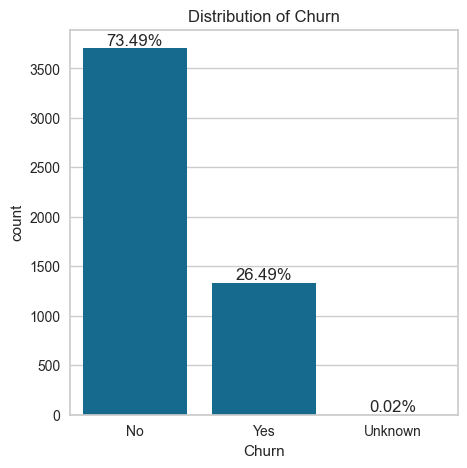

In [23]:
# Preview Target(Churn) variable

target = 'Churn'
plt.figure(figsize=(5,5))
ax = sns.countplot(x = df_train_eda["Churn"])
for container in ax.containers:
    ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.2f}%' for h in container])
plt.title(f'Distribution of Churn')
plt.show()

- The Churn rate is 26.5%

Column: tenure
Skewness: 0.23
Kurtosis: -1.39
Mean: 32.58
Median: 29.0
Standard Deviation: 24.53
----------------------------------------


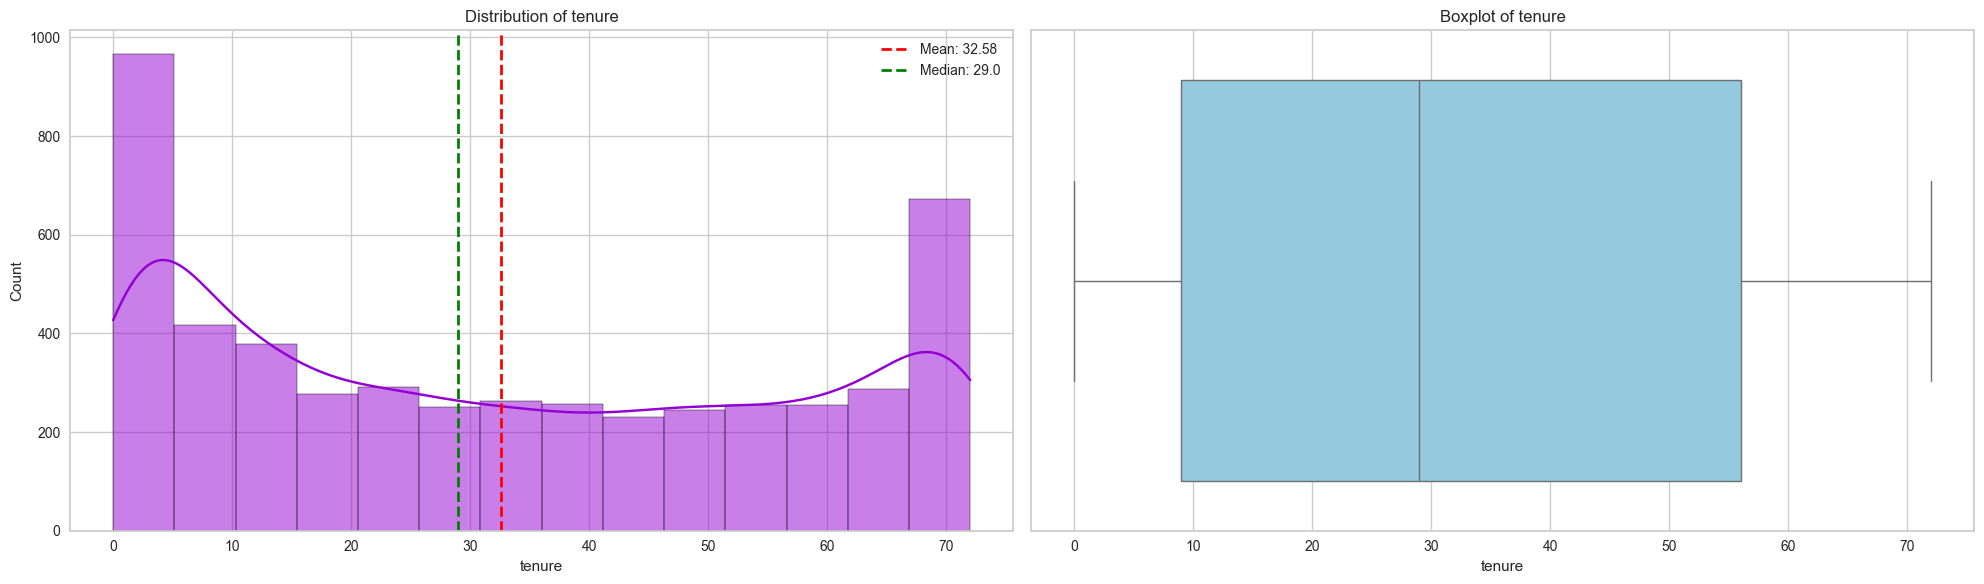

Column: MonthlyCharges
Skewness: -0.24
Kurtosis: -1.25
Mean: 65.09
Median: 70.55
Standard Deviation: 30.07
----------------------------------------


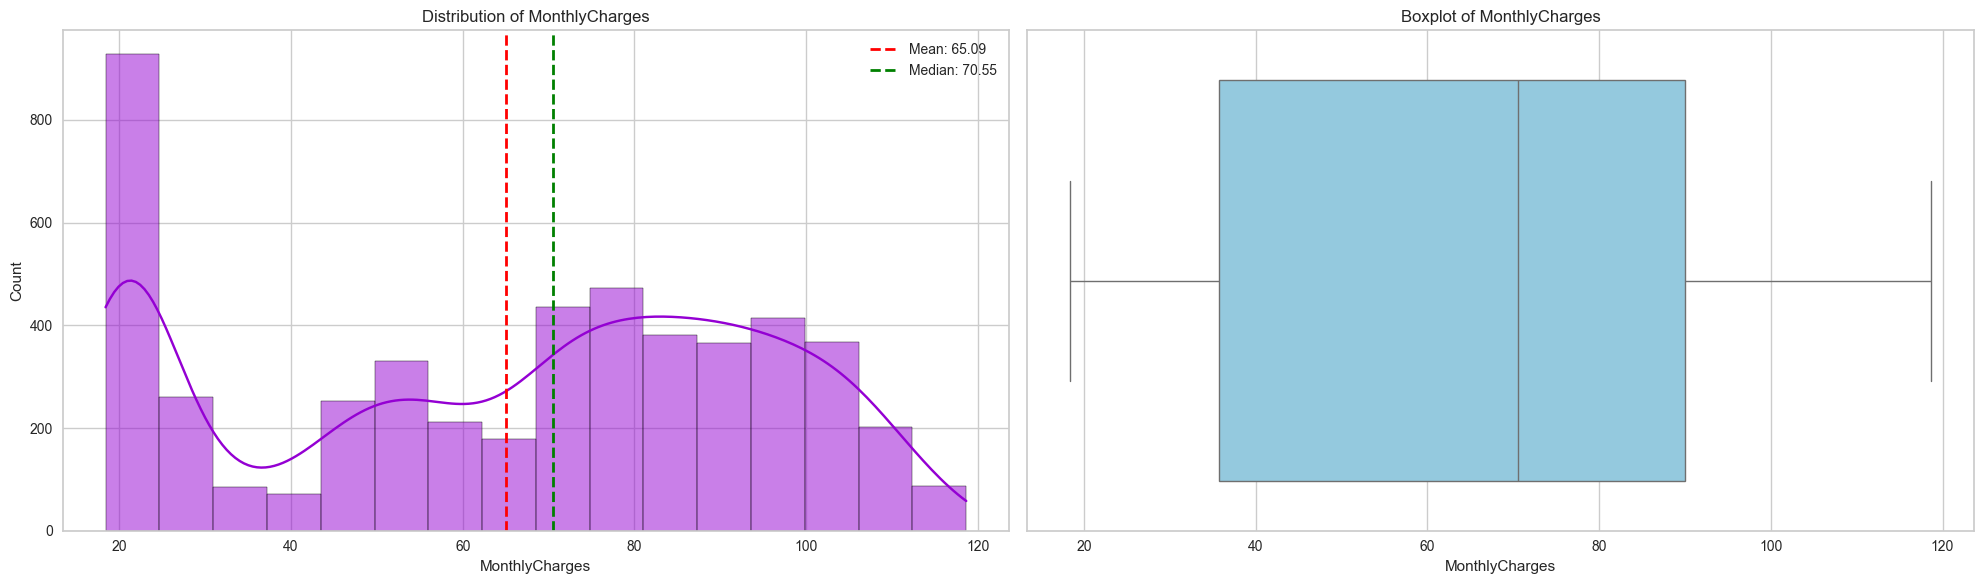

Column: TotalCharges
Skewness: 0.94
Kurtosis: -0.28
Mean: 2302.06
Median: 1401.15
Standard Deviation: 2269.48
----------------------------------------


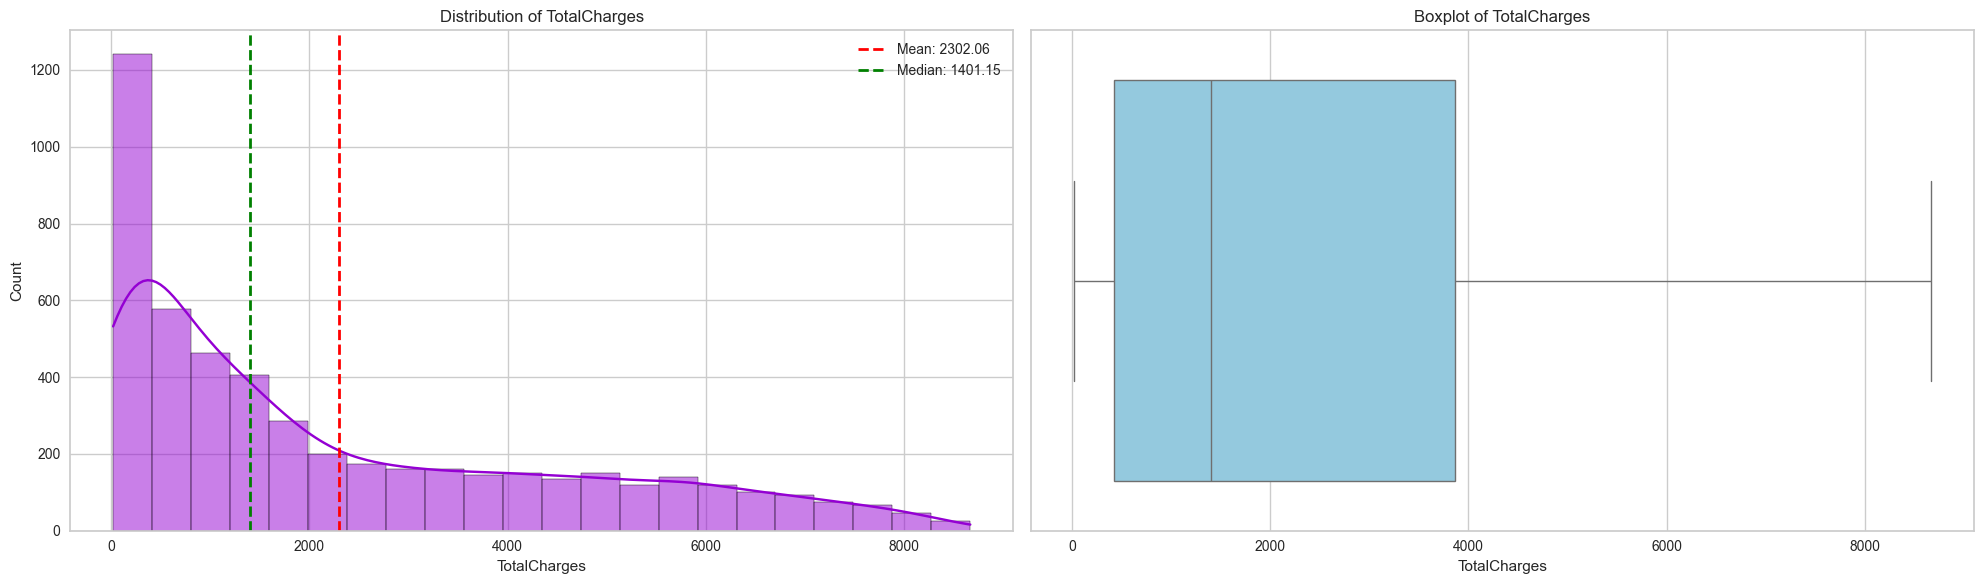

In [24]:
# Preview the distribution of the Subcriber Account numerical features

for col in subscriber_account_numerical:
    # Calculate skewness and kurtosis
    skewness = round(df_train_eda[col].skew(), 2)
    kurtosis = round(df_train_eda[col].kurtosis(), 2)
    
    # Calculate basic statistics
    mean = round(df_train_eda[col].mean(), 2)
    median = round(df_train_eda[col].median(), 2)
    std_dev = round(df_train_eda[col].std(), 2)
    
    # Print column name and its statistics
    print(f"Column: {col}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {std_dev}")
    print("-" * 40)
    
    # Plot histograms with KDE and boxplots
    plt.figure(figsize=(20, 6))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df_train_eda[col], kde=True, color='darkviolet', edgecolor='black')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean}')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median}')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_train_eda[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

**Tenure**

- Tenure has biomodal distribution

- The tenure's skewness value of 0.23 indicates a slight positive skew. 

- The tenure is platikurtic with a value of -1.39, which indicates a flatter distribution spread out around the mean

**Monthly Charges**

- The MonthlyCharges' skewness value of -0.24 indicates a slight negative skew. 

- It is also platikurtic with a value of -1.25, which indicates a flatter distribution spread out around the mean

**Total Charges** 

- The TotalCharges' skewness value of 0.94 indicates a moderate positive skew. 

- The TotalCharges' scale is on a significantly larger range in contrast with the other numerical features

**Business Insights**

- The distributions above suggests two broad customer segments

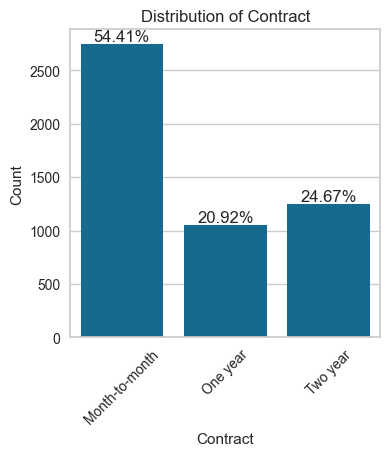

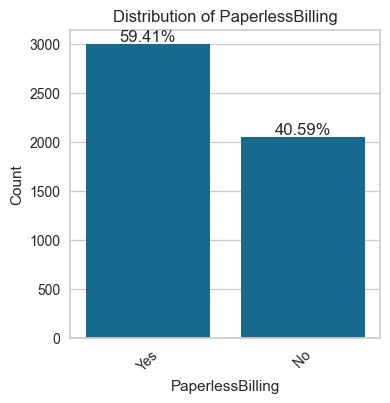

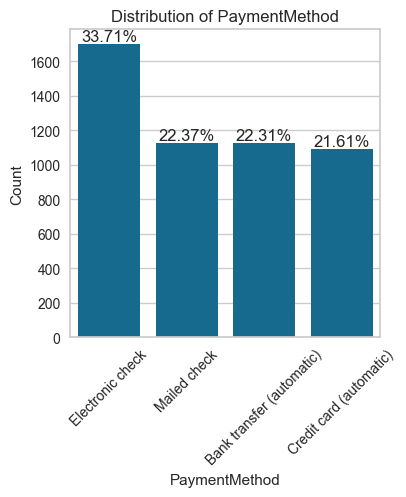

In [25]:
# Preview Distribution of Subscriber Account categorical features less CustomerID

# Iterate through each subscription feature to create a count plot
for feature in subscriber_account_categorical:
    plt.figure(figsize=(4, 4))
    ax = sns.countplot(data=df_train_eda, x=feature)
    for container in ax.containers:
        ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.2f}%' for h in container])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

- For the Subscriber Account segment, 54% the contracts are month-to-month and the rest of the 46% are almost evenly split the annual & 2 year contracts

- 59% of the Subscriber Account are on Paperless Billing

- 33.7% of the Subscriber Account are on Electronic Check Payment Method

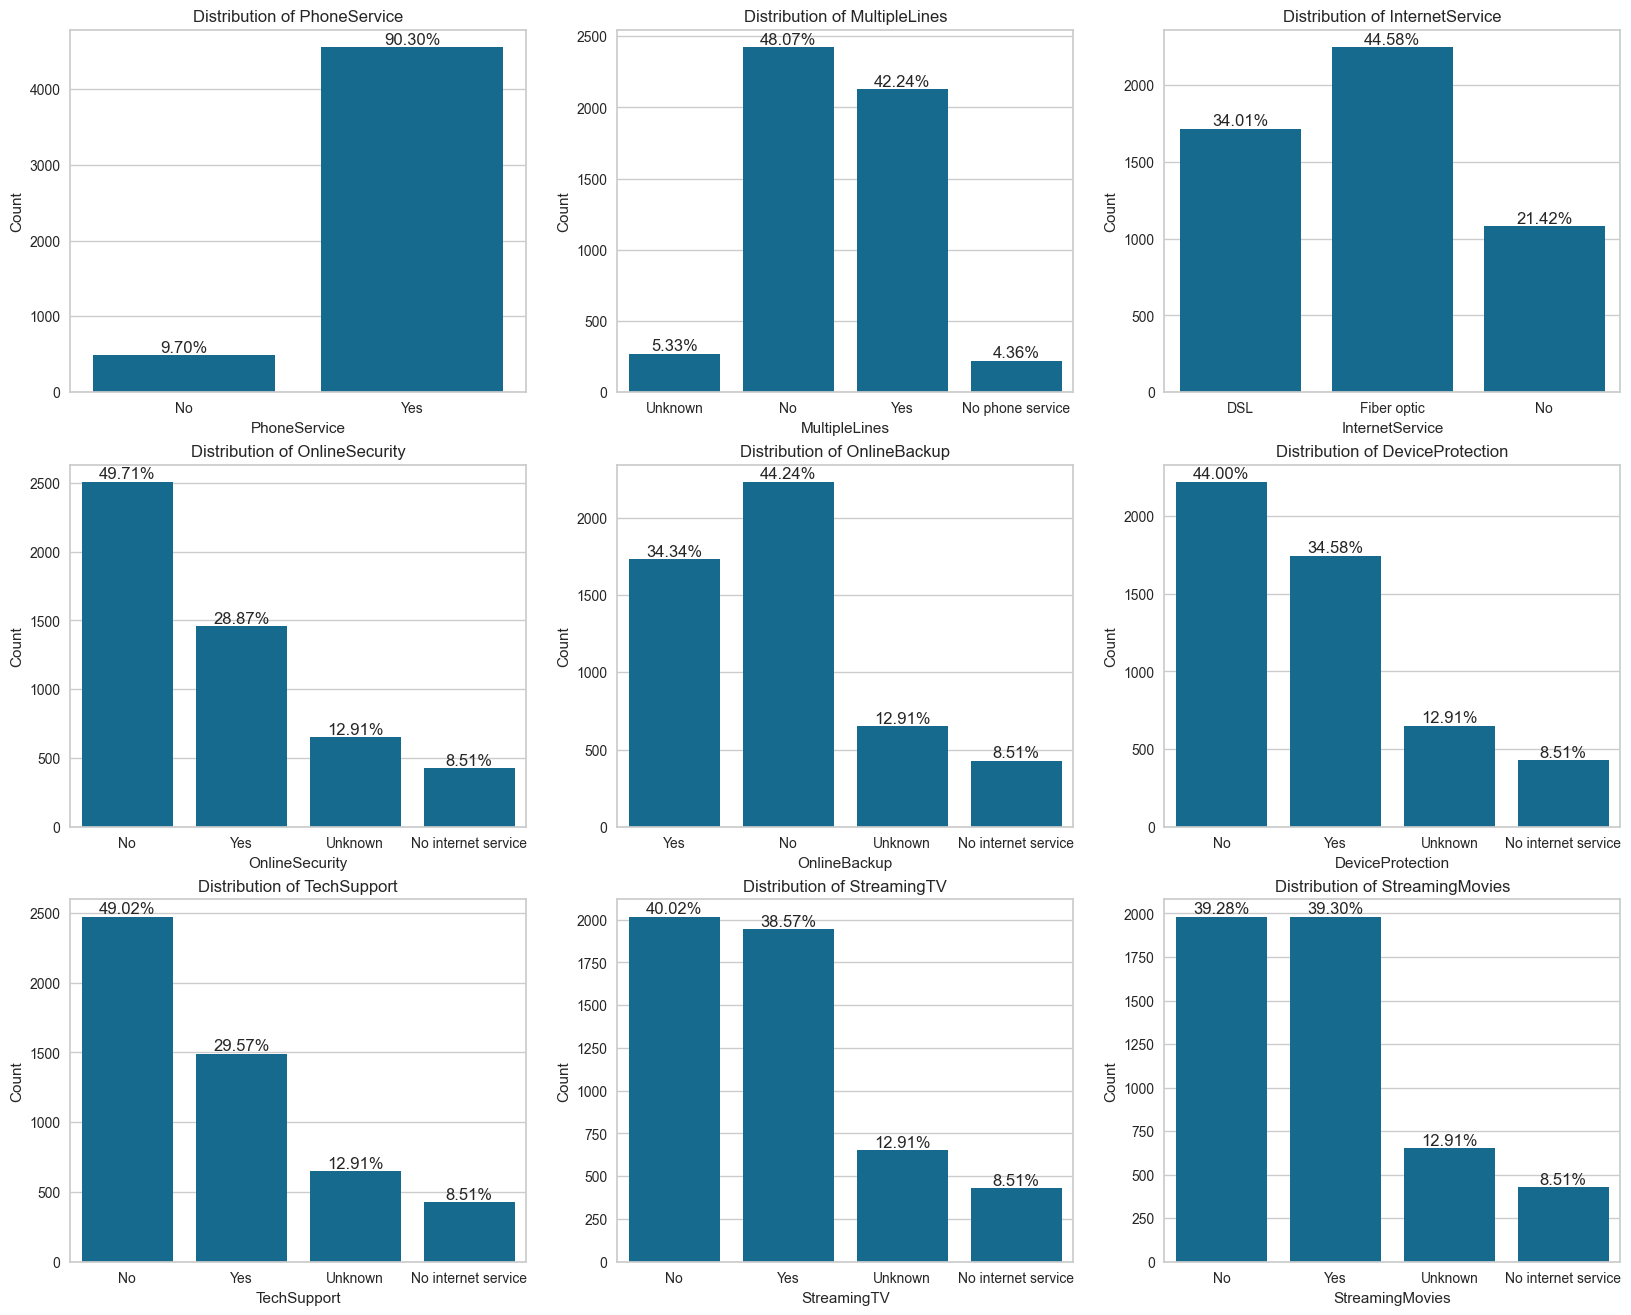

In [26]:
# The distribution of Subscibtions

# Calculate the number of rows and columns needed for subplots
num_features = len(subscribtions)
cols = 3
rows = (num_features // cols) + (num_features % cols)

# Create the subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each subscription feature and create a count plot
for i, feature in enumerate(subscribtions):
    ax = axes[i]
    sns.countplot(data=df_train_eda, x=feature, ax=ax)
    for container in ax.containers:
        ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.2f}%' for h in container])
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

**Observations**

- A significant portion of subscribers (90.30%) have Phone services

- Nearly half of all Phone service subscribers(42.24%) also have multiple Lines

- A sizeable 78.49% of all subscribers have Internet services

- OnlineBackup and DeviceProtection have very similar distributions (34.34% vrs. 34.58% for both subcribtions and 44.24% vrs 44% for both without subscriptions all respectively)

- StreamingTV and StreamingMovies services have highly similar distributions with only 38.57% and 39.30% of customers respectively subscribing to these services, whereas 
40.02% and 39.28% of customers respectively are without these subscribtions

- The next stricking similarity in distribution is between OnlineSecurity and TechSupport with only 28.87% and 29.57% of customers respectively subscribing to these services 
whereas 49.71% and 49.02% of customers respectively are without these subcribtions

**Business Insights**

- Based on the above, the subscriptions with similar distributions can be bundled into sub-products and marketed together to minimize the cost.

- **C. Bivariate Analysis**

In [27]:
# Define a function to plot categorical features versus the target('Churn') variable

def plot_categorical_feature_vs_target(df_train_eda, categorical_features, target):
    # Set the number of columns and rows for the subplots
    number_of_columns = 3
    number_of_rows = math.ceil(len(categorical_features)/number_of_columns)
    # Create the figure and subplots
    fig = plt.figure(figsize=(20, 6*number_of_rows))

    for i, column in enumerate(categorical_features, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, i)
        # Create a countplot of the categorical feature grouped by the target variable
        sns.countplot(data=df_train_eda, x=column, hue=target, ax=ax)
        # Create labels and titles for each subplots
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'Distribution of {column} vrs {target}')
        # Rotate the x-axis labels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        # Add labels to the bars in the plot
        for container in ax.containers:
            ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.1f}%' for h in container])
        # Add a legend to the plot
        ax.legend(title='Churn Rate', bbox_to_anchor=(1.05, 1), loc='upper left')
        # Adjust layout to prevent overlap
        plt.tight_layout()
        # Show the plot
    return plt.show()


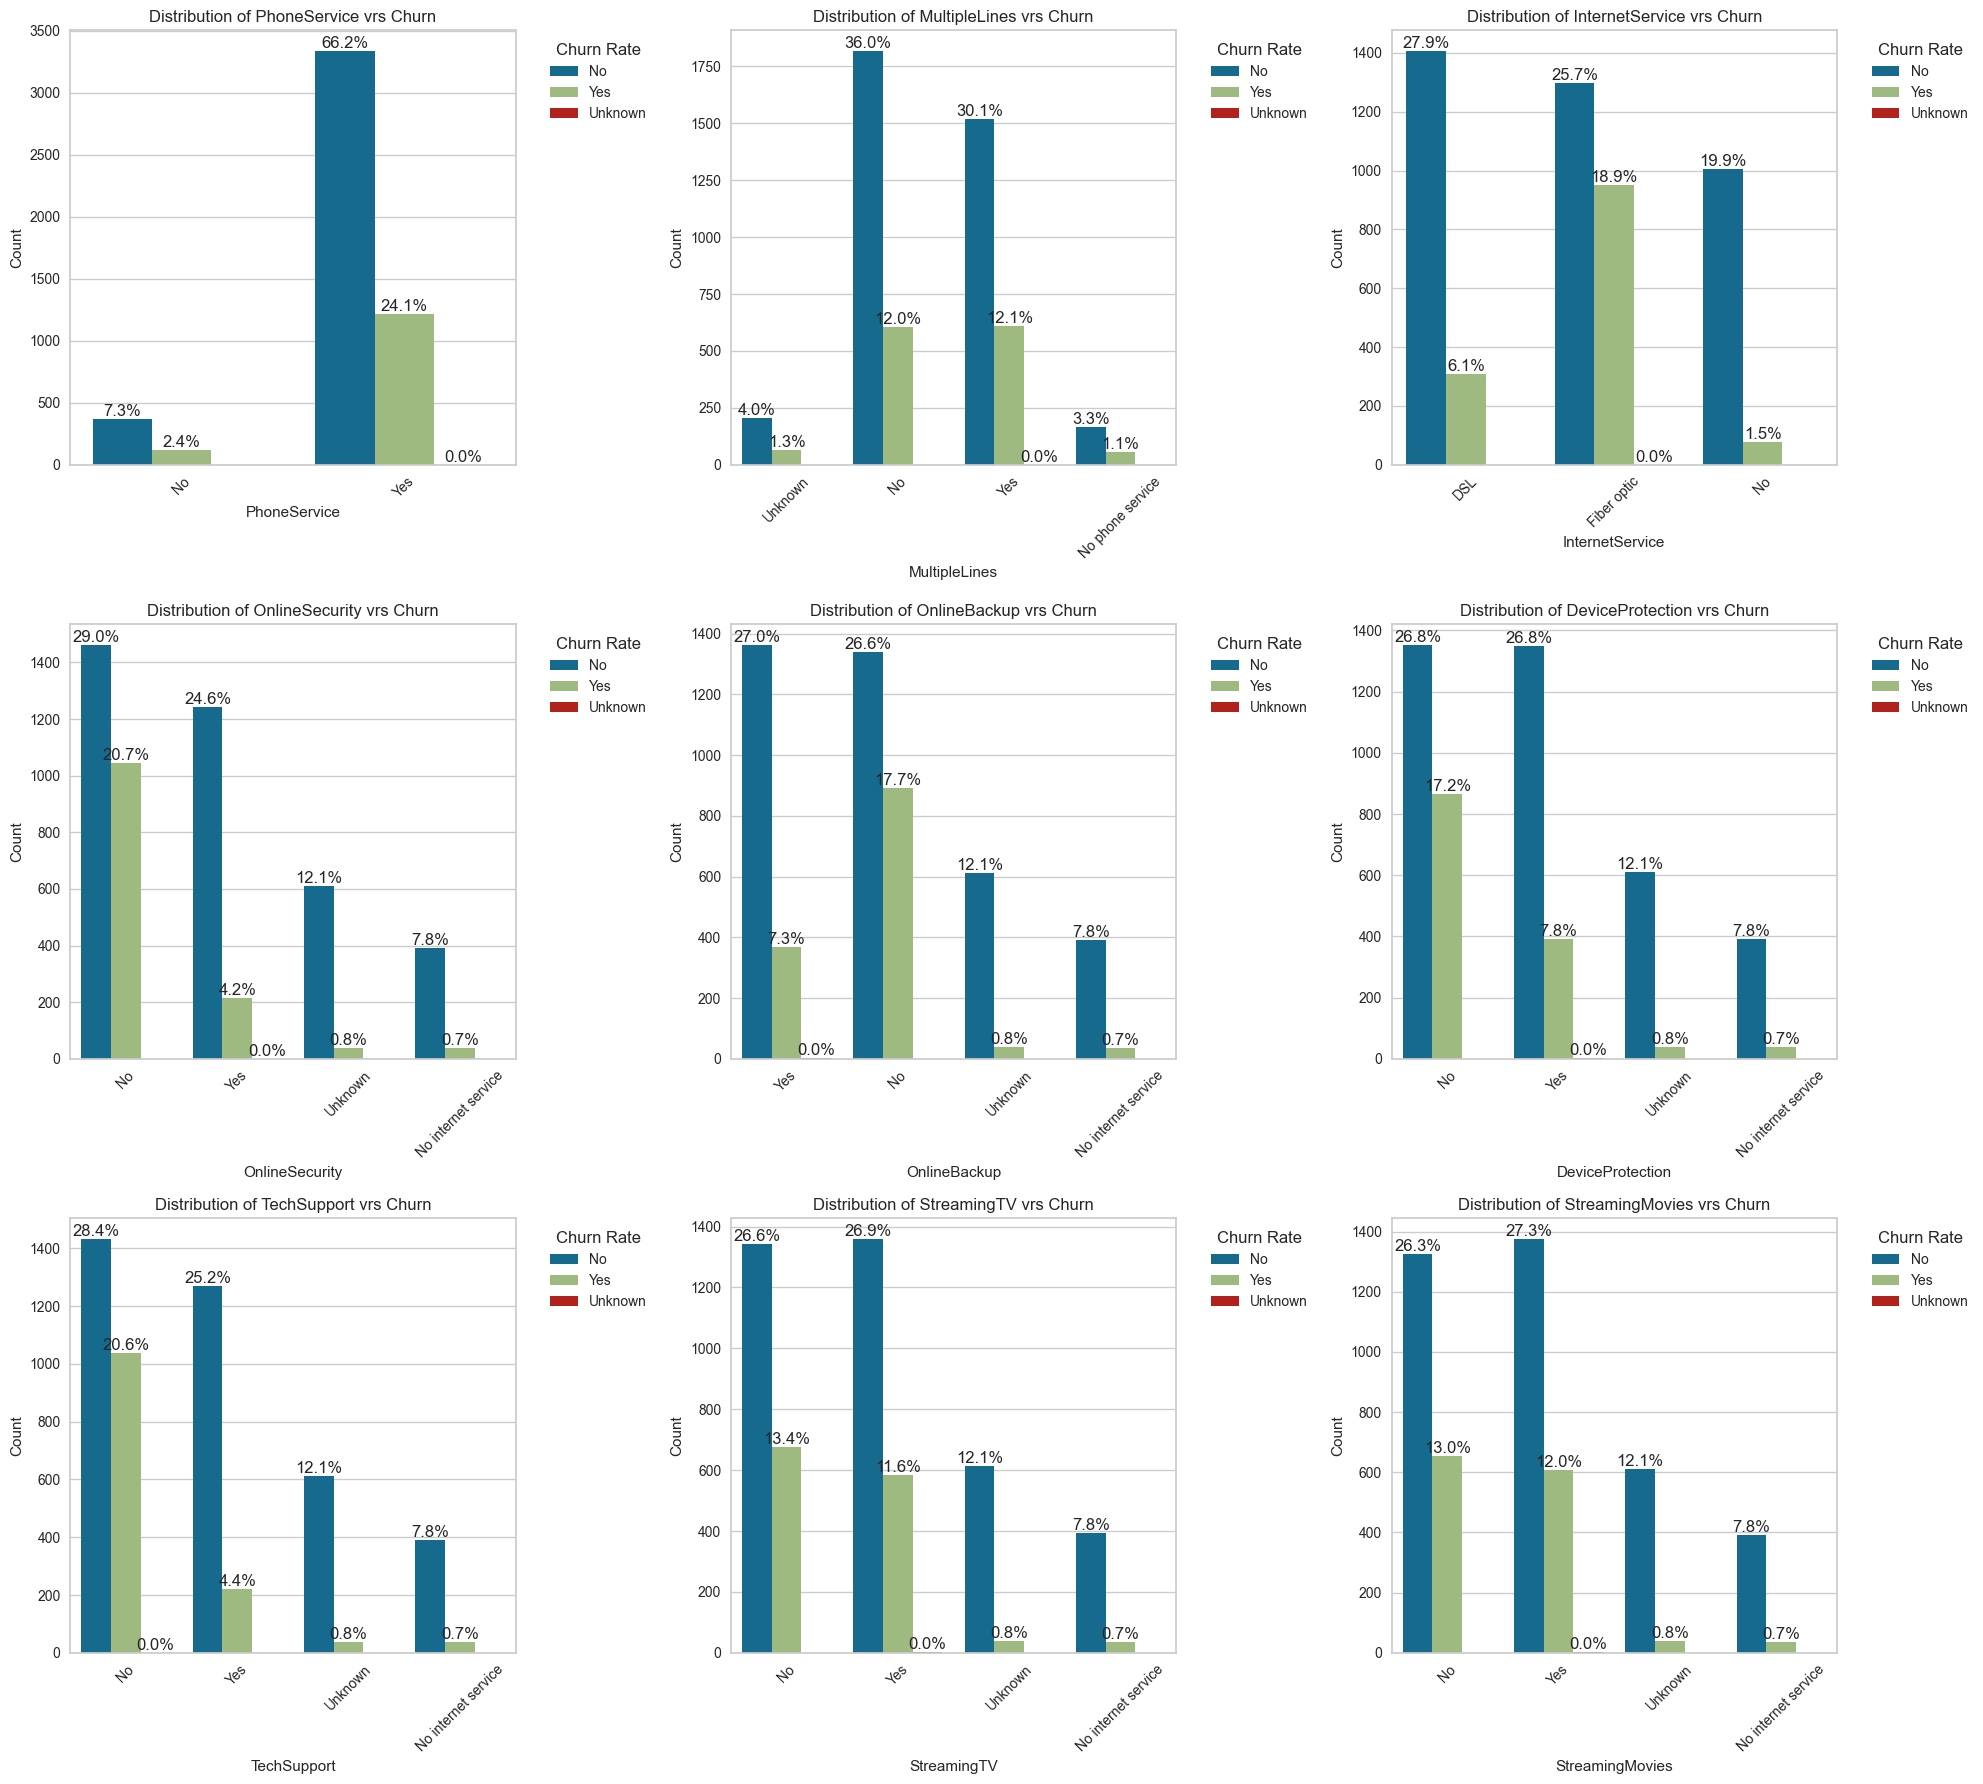

In [28]:
#View Subscribtions: services subscribed to by the customers
subscribtions = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plot_categorical_feature_vs_target(df_train_eda, subscribtions, "Churn")

**Observations on Subscribtions with Churn**

- Subscribers with PhoneService Churn at 24.1% which is close to the company's churn rate of 26.49%

- Even though the are more DSL(27,9%) than Fiber Optic(25.7%) InternetService subscribers, the DSL subscribers Churn at (6.1%) which is three times less than the fiber Optic
 subscribers who Churn at 18.9% respectively

- Subscribers with OnlineSecurity and TechSupport have lower Churn rates at 4.2% and 4.4% respectively versus subcribers without these services who churn at 20.7% and 20.6% respectively

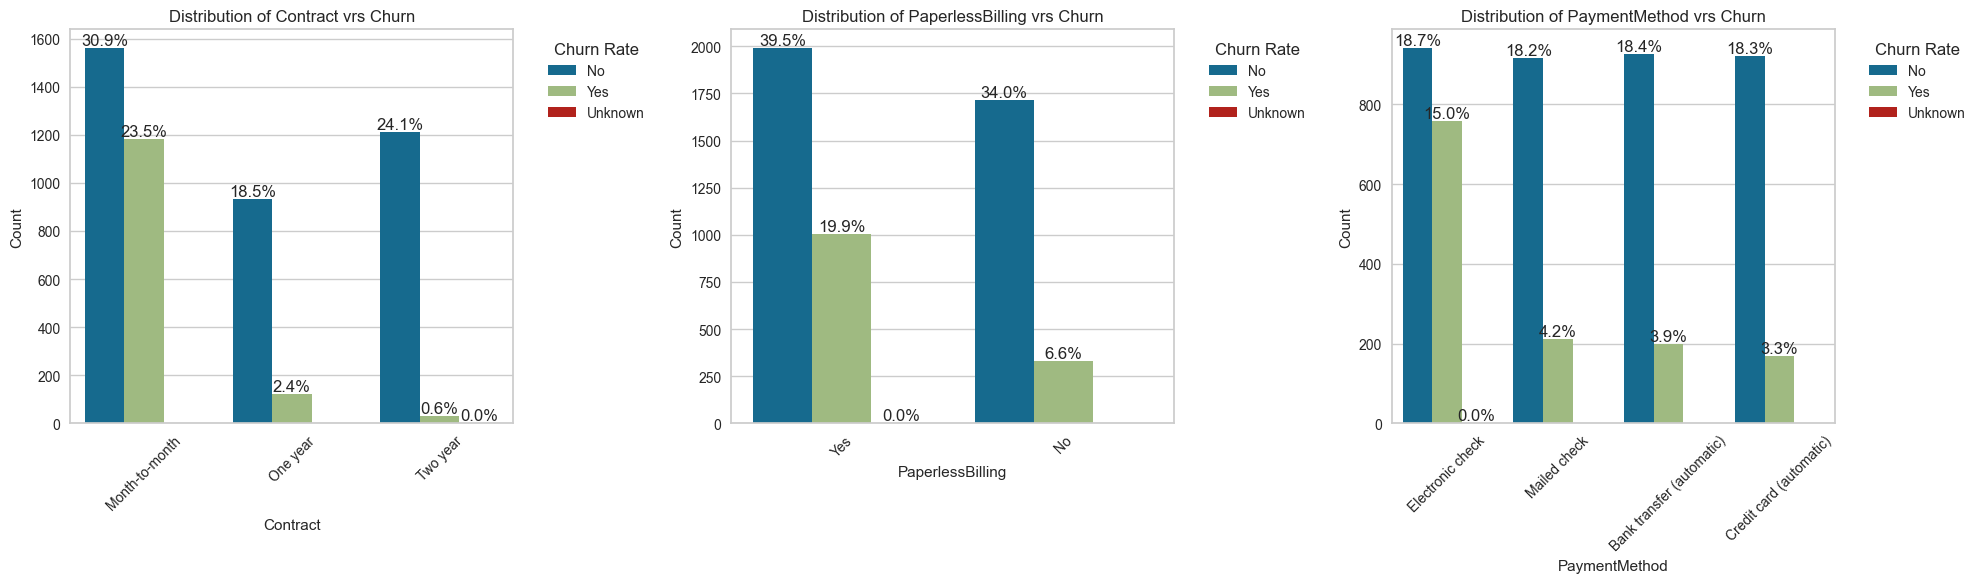

In [29]:
# View Subscriber Account Categorical features vs Target(Churn)

subscriber_account_categorical = ['Contract','PaperlessBilling','PaymentMethod']
plot_categorical_feature_vs_target(df_train_eda, subscriber_account_categorical, "Churn")
for container in ax.containers:
            ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.1f}%' for h in container])

**Observations for Subscribers Account Categorical features vs Target(Churn)**

- The Churn rate for the month-to-month contract is 23.5% in relation to the other contract types and is quite close the Company Churn rate of 26.5%

- Even though the distribution of No Churn rate for all PaymentMethod hover around 18%, the Churn rate for Electronic check is 15.% which over three(3) times higher than the other PaymentMethods

In [30]:
# Define a function to check for outliers in the Account Numerical features and plot their distributions versus the 'Churn'.

def check_for_outliers(df_train_eda, numerical_features):
    # Calculate the number of rows and columns for subplots
    number_of_columns = 3
    number_of_rows = math.ceil(len(numerical_features) / number_of_columns)

    # Create the figure and set the size dynamically based on the number of rows
    fig, axes = plt.subplots(number_of_rows, number_of_columns, figsize=(20, 6 * number_of_rows))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Iterate through each numerical feature and create a box plot
    for i, feature in enumerate(numerical_features):
        ax = axes[i]
        
        # Create a box plot for the numerical feature grouped by 'Churn'
        sns.boxplot(data=df_train_eda, x='Churn', y=feature, palette='viridis', ax=ax)
        
        # Set plot title and labels
        ax.set_title(f'Distribution of {feature} vs Churn', fontsize=15)
        ax.set_xlabel('Churn', fontsize=12)
        ax.set_ylabel(feature, fontsize=12)
    
    # Remove any unused subplots
    for i in range(len(numerical_features), len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout to prevent overlap
    plt.tight_layout()

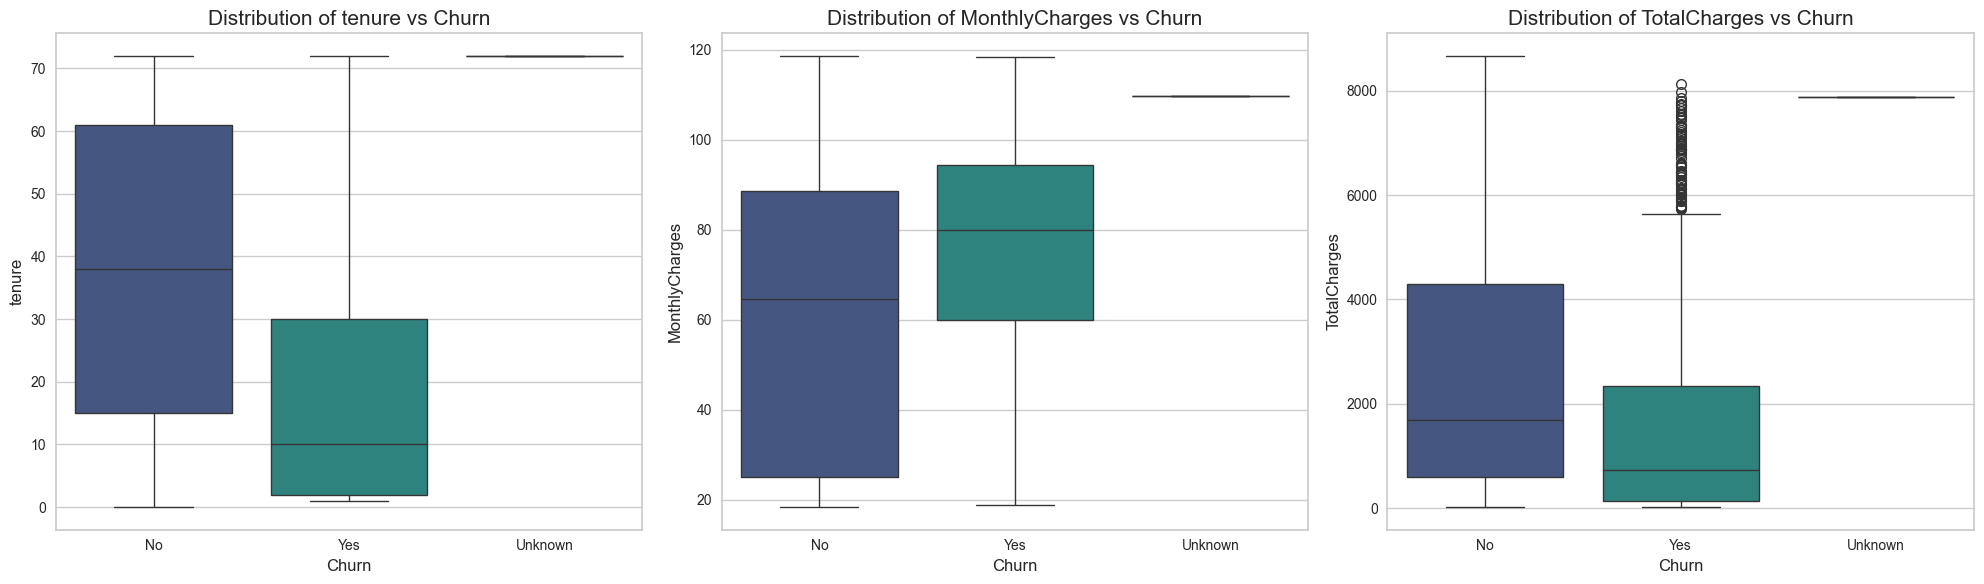

In [31]:
# Check for outliers

check_for_outliers(df_train_eda, subscriber_account_numerical)

**Observations for Subscribers Account Numerical features vs Target(Churn)**

- TotalCharges vrs Churn has outliers

- Subscribers with shorter tenure have a higer Churn rate, potentially because new subscribers tend to churn once the service doesn't meet their expectations.

- Subscribers with higher MonthlyCharges have a higher Churn rate.

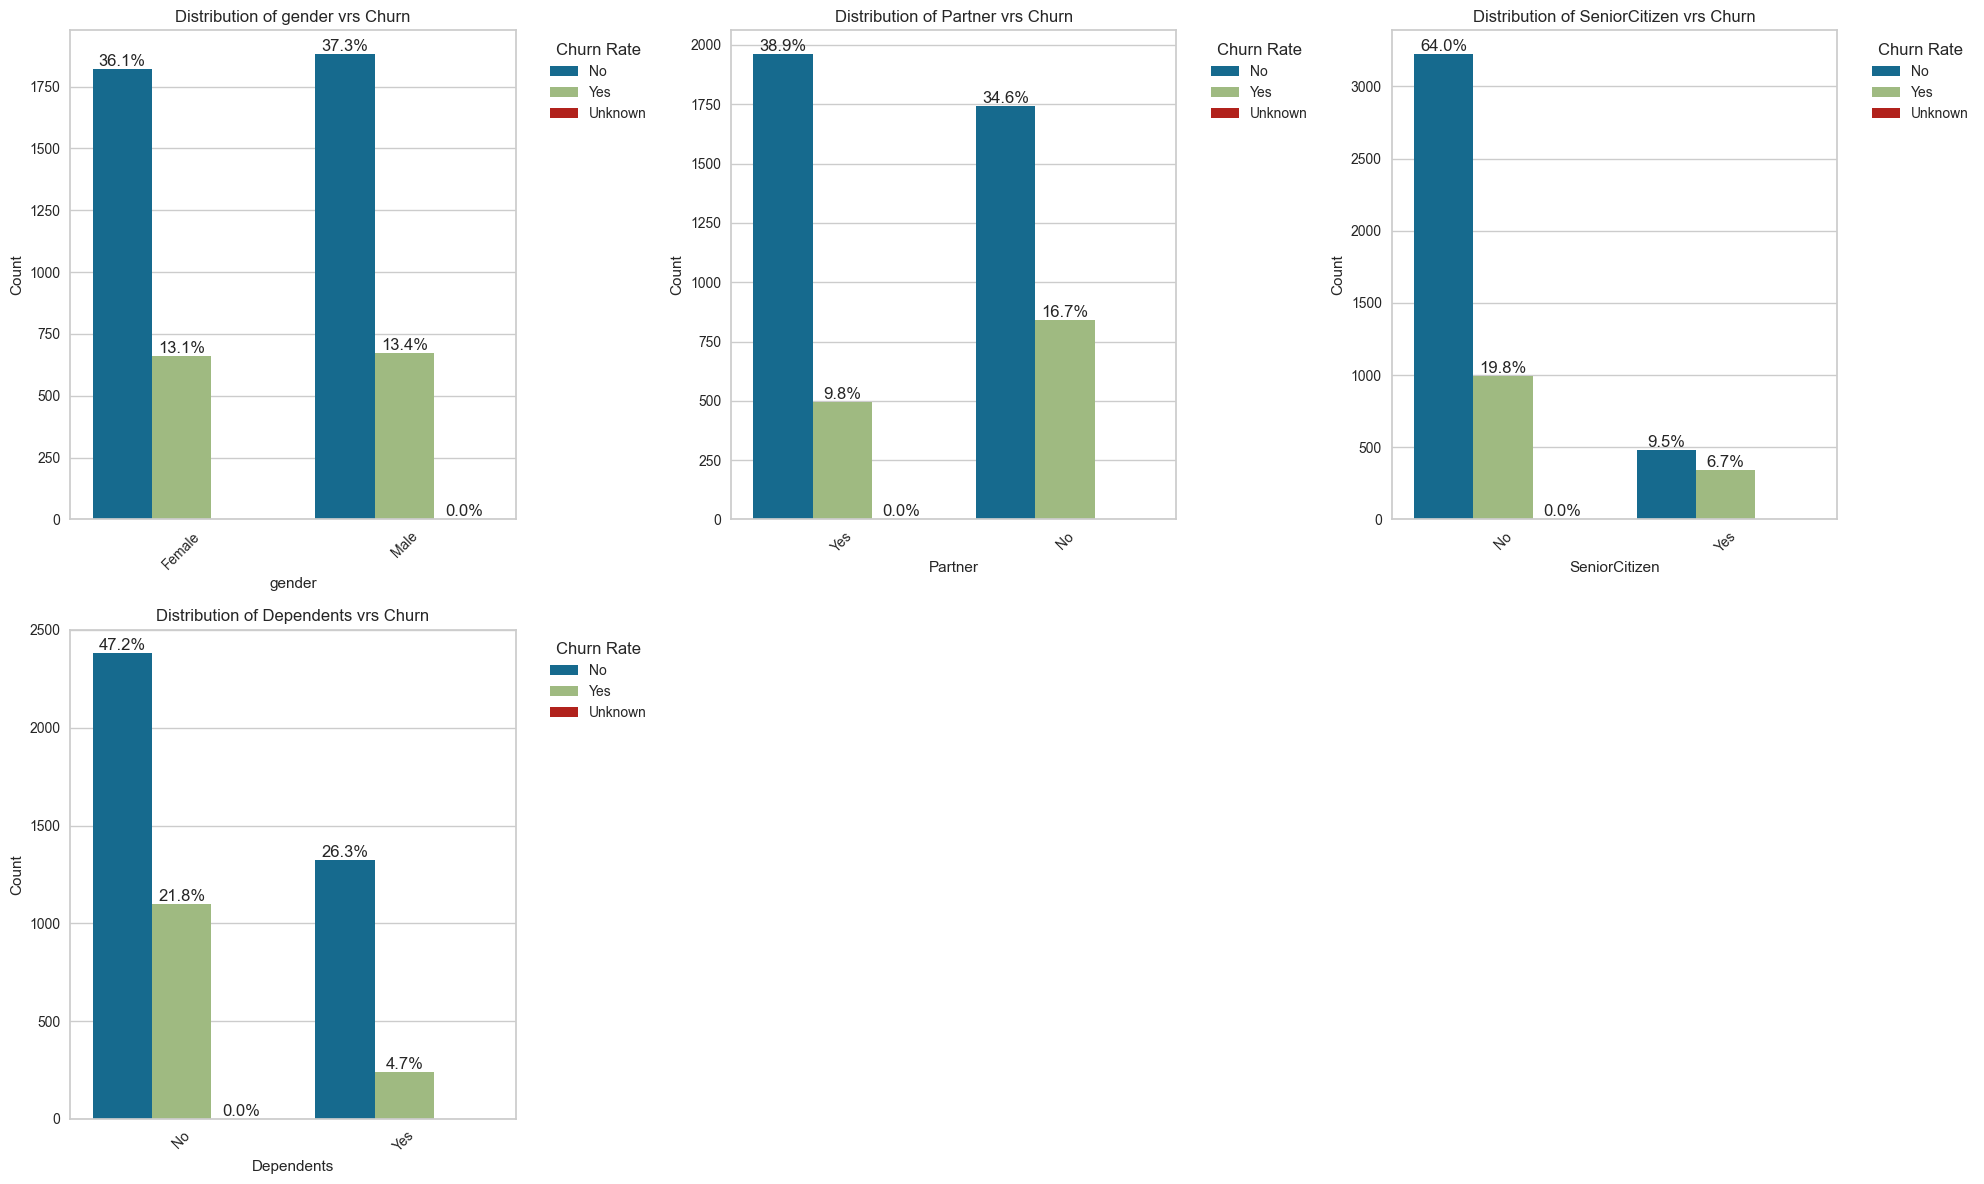

In [32]:
# View Subcriber Demographic Information('gender', 'Partner', 'SeniorCitizen', 'Dependents')

subscriber_demographic = ['gender', 'Partner', 'SeniorCitizen', 'Dependents']

plot_categorical_feature_vs_target(df_train_eda, subscriber_demographic, "Churn")
for container in ax.containers:
        ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.1f}%' for h in container])

**Observations for Subscribers Demographic Categorical features vs Target(Churn)**

- The Churn rate of Subscribers is almost gender neutral at approximately 13% for both male and female.

- Subscribers with Partners Churn at 9.8% versus those without Churn at 16%

- Subscribers with Dependents Churn at only 4.7% versus those without Churn at 21%


- **D. Multivariate Analysis**

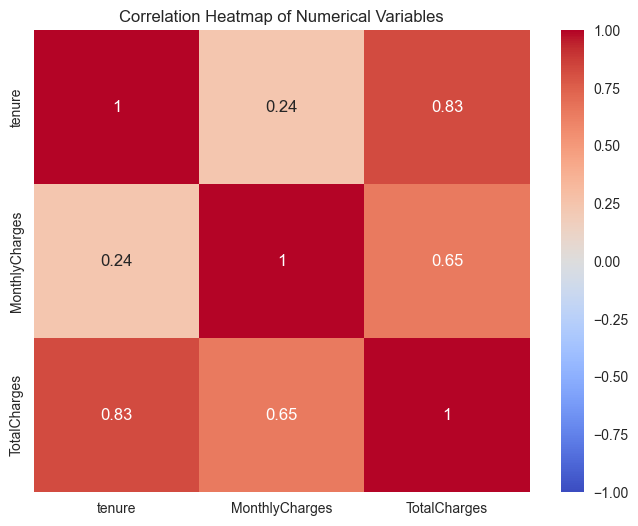

In [33]:
# Heatmap of subscriber numerical features

plt.figure(figsize=(8, 6))
sns.heatmap(df_train_eda[subscriber_account_numerical].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()



**Observations for Subscribers Numerical features vs Target(Churn)**

- The tenure has a strong positive correlation with TotalCharges at 0.83

- The tenure has a weak positive correlation MonthlyCharges at 0.24

- MonthlyCharges has a relavtively moderate positive correlation with TotalCharges at 0.65

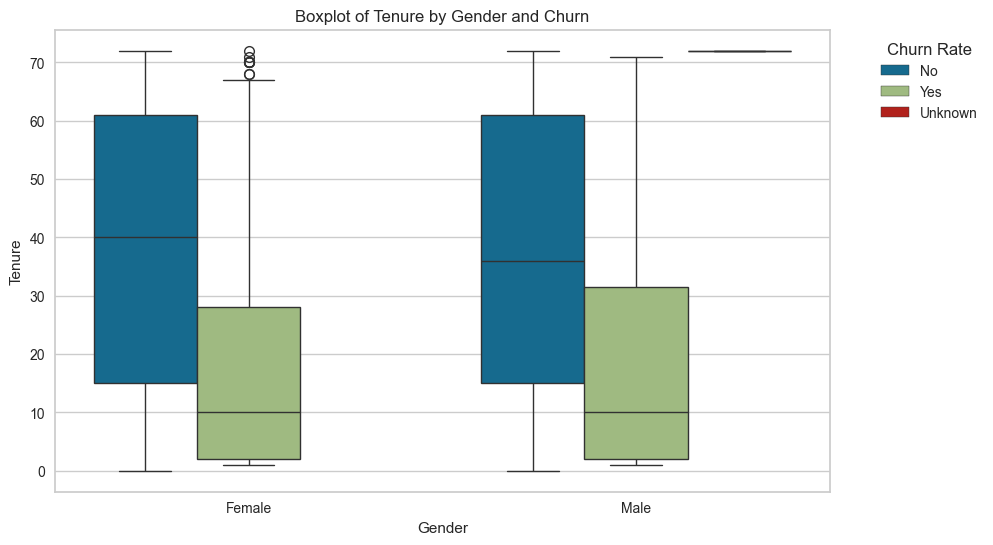

In [34]:
# Boxplot of Tenure by Gender and Churn

# Define the plot size
plt.figure(figsize=(10, 6))

# Create a boxplot of tenure by gender and Churn
sns.boxplot(x='gender', y='tenure', hue='Churn', data=df_train_eda)

# Set plot title and labels
plt.title('Boxplot of Tenure by Gender and Churn')
plt.xlabel('Gender')
plt.ylabel('Tenure')

# Display the legend

plt.legend(title='Churn Rate', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


**Observations for the Boxplot of Tenure by Gender and Churn Rates**

- For both males and females, churn rate is positively skewed indicating more concentration of customers at the lower end of the tenure spectrum.

- The are visible outliers the tenure at which the female churn

<Figure size 1200x800 with 0 Axes>

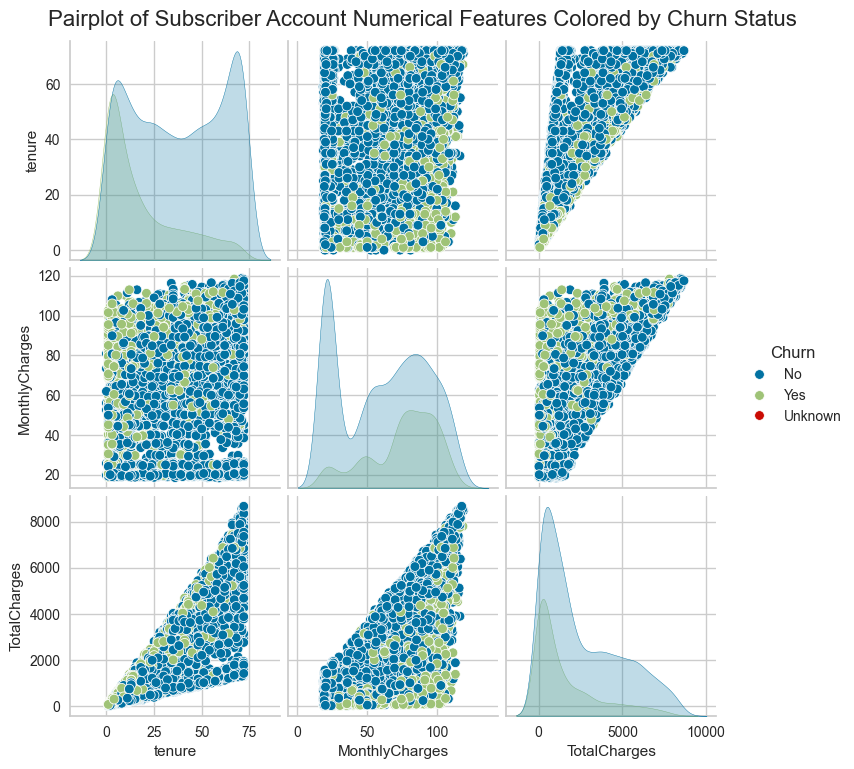

In [35]:
# Create a pairplot of the selected numerical features with the 'Churn' as hue 

plt.figure(figsize=(12, 8))
sns.pairplot(df_train_eda[subscriber_account_numerical + ['Churn']], hue='Churn')

# Set a descriptive title for the plot
plt.suptitle('Pairplot of Subscriber Account Numerical Features Colored by Churn Status', fontsize=16, y=1.02)

# Show the plot
plt.show()

**Observations**

- The churn effect of TotalCharges appears to correlate with the effect of tenure (strong) and MonthlyCharges (moderate).

- The distribution of tenure for those that churn is different from those that do not churn when compared to the other categories of MonthlyCharges and TotalCharges.

- **E. Analytical Questions & Feature Engineering**

**i. Zero Feauture engineering**

1. What is the churn rate for customers with only Phone_service

Churn rate for customers with only PhoneService:
Churn
No         73.276241
Yes        26.701801
Unknown     0.021959
Name: proportion, dtype: float64


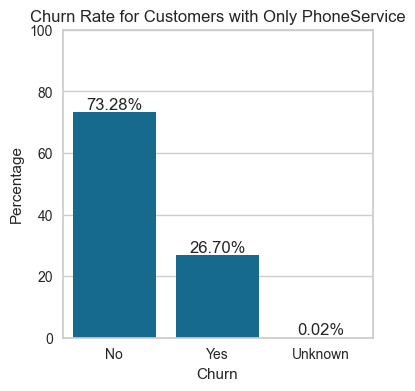

In [36]:
# Churn rate for customers with only Phone_service

# Filter customers with only PhoneService
phone_service_only = df_train_eda[(df_train_eda['PhoneService'] == 'Yes')] 

# Calculate churn rate
churn_rate = phone_service_only['Churn'].value_counts(normalize=True) * 100

# Print churn rate
print("Churn rate for customers with only PhoneService:")
print(churn_rate)

# Visualize the churn rate
plt.figure(figsize=(4, 4))
sns.barplot(x=churn_rate.index, y=churn_rate.values)
plt.title('Churn Rate for Customers with Only PhoneService')
plt.ylabel('Percentage')
plt.xlabel('Churn')
plt.ylim(0, 100)
for index, value in enumerate(churn_rate.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')
plt.show()

- The Churn Rate for customers with only phone service is 26.7% is very close to the company churn rate of 26.49%

2. Does the type of contract affect the churn?

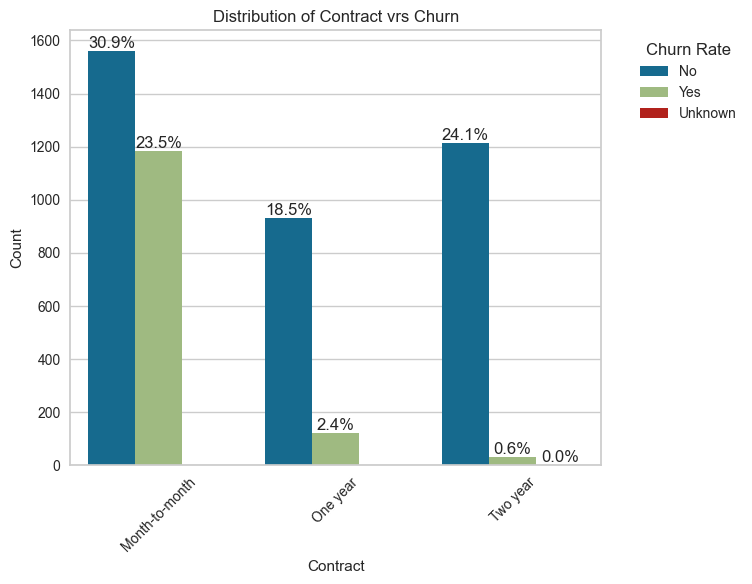

In [37]:
# Contract vs Target(Churn)
contract_type = ['Contract']
plot_categorical_feature_vs_target(df_train_eda, contract_type, "Churn")
for container in ax.containers:
            ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.1f}%' for h in container])

- The 2 year contract has the lower churn rate as compared to the one year contract

- The month-to-month contract churn rate is not too distinct from the company churn rate of 26.49

3. How does the customer payment_method vary with the churn rate?

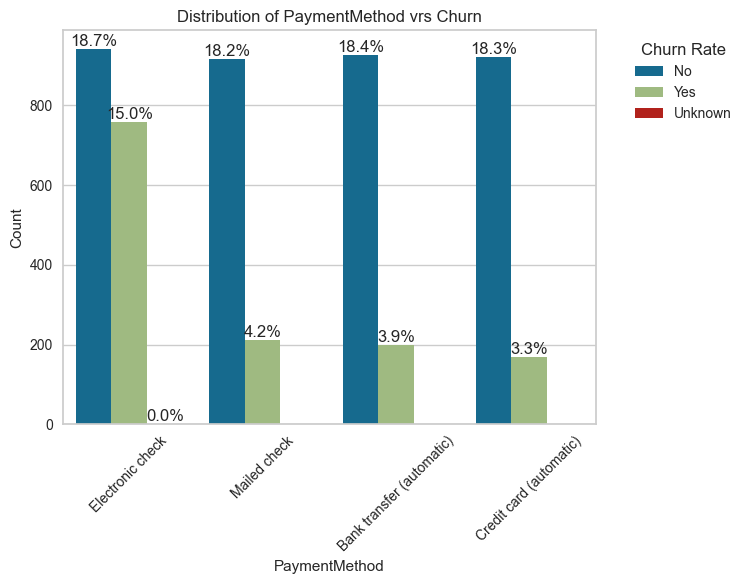

In [38]:
# Customer payment method vrs churn rate

# Payment_method vs Target(Churn)
paymt_type = ['PaymentMethod']
plot_categorical_feature_vs_target(df_train_eda, paymt_type, "Churn")
for container in ax.containers:
            ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.1f}%' for h in container])

- Even though the distribution of No Churn rate for all PaymentMethod hover around 18%, the Churn rate for Electronic check is 15.% which over three(3) times higher than the other PaymentMethods

4. Is churn affected by the presence of partner or dependents?

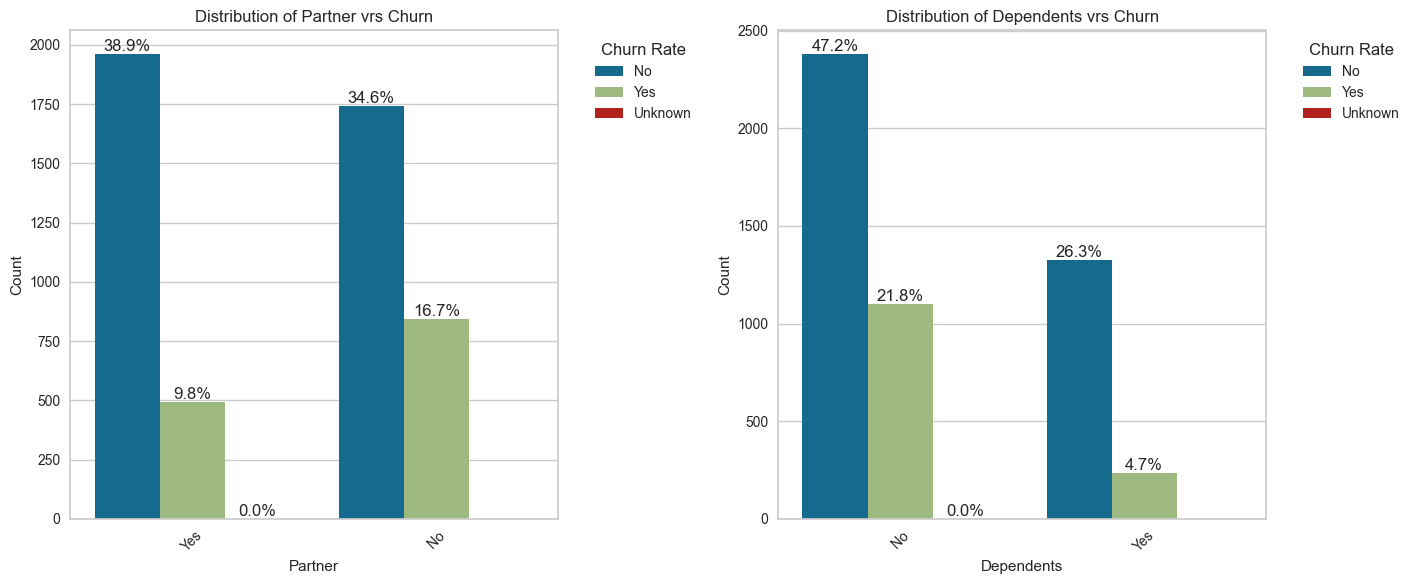

In [39]:
# Partner and dependents presence vrs churn rate

part_depend = ['Partner', 'Dependents']

plot_categorical_feature_vs_target(df_train_eda, part_depend, "Churn")
for container in ax.containers:
        ax.bar_label(container, labels=[f'{h.get_height()/len(df_train_eda)*100:.1f}%' for h in container])

- Subscribers without partners have higher churn rate(16.7%) in contrast to those having partners(9.8%)

- Subscribers without Dependents also have higher churn rate(21.8%) in contrast to those having dependents(4.7%)

**ii. Feauture engineering**

5. How do the average monthly charges vary across different customer tenures?

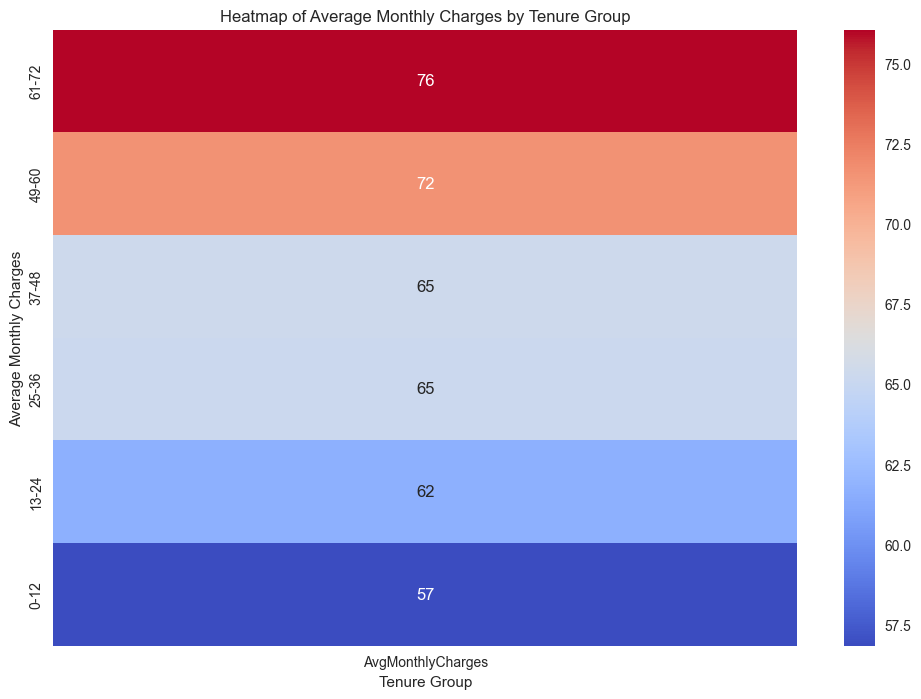

In [40]:
# Ensure there are no zero or missing values in 'tenure' to avoid division by zero
df_train_eda['tenure'].replace(0, 1, inplace=True)

# Create the 'AvgMonthlyCharges' feature (TotalCharges/tenure)
df_train_eda['AvgMonthlyCharges'] = df_train_eda['TotalCharges'] / df_train_eda['tenure']

# Copy the DataFrame
df_train_eda1 = df_train_eda.copy()

# Create tenure groups
df_train_eda1['tenure_group'] = pd.cut(df_train_eda1['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

# Create a pivot table for the heatmap
pivot_table = df_train_eda1.pivot_table(values='AvgMonthlyCharges', index='tenure_group', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, cbar=True)
plt.title('Heatmap of Average Monthly Charges by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Average Monthly Charges')
plt.gca().invert_yaxis()
plt.show()

**Observations**

- Customers in the early tenure groups (0-12 and 13-24 months) are at higher risk of churn, possibly due to lower perceived value in the services for the cost they are incurring.

- Mid-tenure groups (25-36 and 37-48 months) show stability in charges, which may indicate a balanced relationship with the service provider, reducing churn risk.

- Long-tenure groups (49-60 and 61-72 months) with higher average monthly charges demonstrate strong customer loyalty and a lower risk of churn, as they likely perceive significant value in the services provided.

6. How does the ratio of monthly charges to total charges vary across different customer tenures?

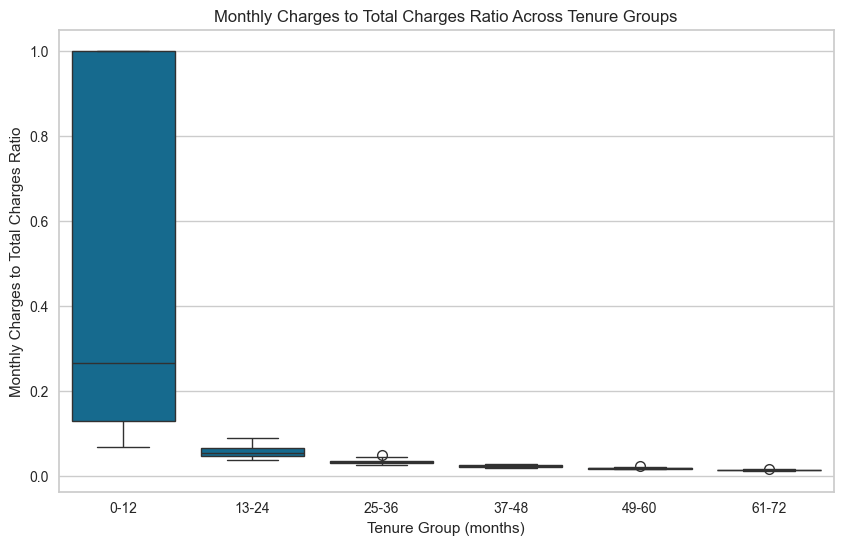

In [41]:
# Ensure there are no zero or missing values in 'TotalCharges' to avoid division by zero
df_train_eda['TotalCharges'].replace(0, 1, inplace=True)

# Create the 'MonthlyChargesToTotalChargesRatio' feature (MonthlyCharges/TotalCharges)
df_train_eda['MonthlyChargesToTotalChargesRatio'] = df_train_eda['MonthlyCharges'] / df_train_eda['TotalCharges']

# Copy the newly created feature to df_train_eda1
df_train_eda1['MonthlyChargesToTotalChargesRatio'] = df_train_eda['MonthlyChargesToTotalChargesRatio']

# Box plot of MonthlyChargesToTotalChargesRatio for different tenure groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='tenure_group', y='MonthlyChargesToTotalChargesRatio', data=df_train_eda1)
plt.title('Monthly Charges to Total Charges Ratio Across Tenure Groups')
plt.xlabel('Tenure Group (months)')
plt.ylabel('Monthly Charges to Total Charges Ratio')
plt.show()

**Observations**

- Higher churn risk: Customers in the 0-12 months group, with high ratios and wide IQR, are more likely to churn. They are new and might not have found sufficient value in the services yet.

- Moderate churn risk: Customers in the 13-24 months group show more stability but still might churn if they do not perceive long-term value.

- Lower churn risk: Customers in the 25-36, 37-48, 49-60, and 61-72 months groups have very low ratios and minimal variation, indicating strong commitment and satisfaction with the services, thereby showing the lowest likelihood of churn.

In [42]:
df_train_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customerID                         5043 non-null   object 
 1   gender                             5043 non-null   object 
 2   SeniorCitizen                      5043 non-null   object 
 3   Partner                            5043 non-null   object 
 4   Dependents                         5043 non-null   object 
 5   tenure                             5043 non-null   int64  
 6   PhoneService                       5043 non-null   object 
 7   MultipleLines                      5043 non-null   object 
 8   InternetService                    5043 non-null   object 
 9   OnlineSecurity                     5043 non-null   object 
 10  OnlineBackup                       5043 non-null   object 
 11  DeviceProtection                   5043 non-null   objec

**Exporting Data**

In [43]:
# Export the DataFrame to an Excel file
output_file = '../Data/LP2_train_final.xlsx'
df_train_eda.to_excel(output_file, index=False)

- **F. Hypothesis Test**


- Null Hypothesis (H0): There is no statistical significant relationship between churn rate and the contract term of the customer


- Alternative Hypothesis (H1): There is a statistical significance relationship between churn rate and the contract term of the customer

**Stacked Bar Chart of Churn Rates by Contract Type**

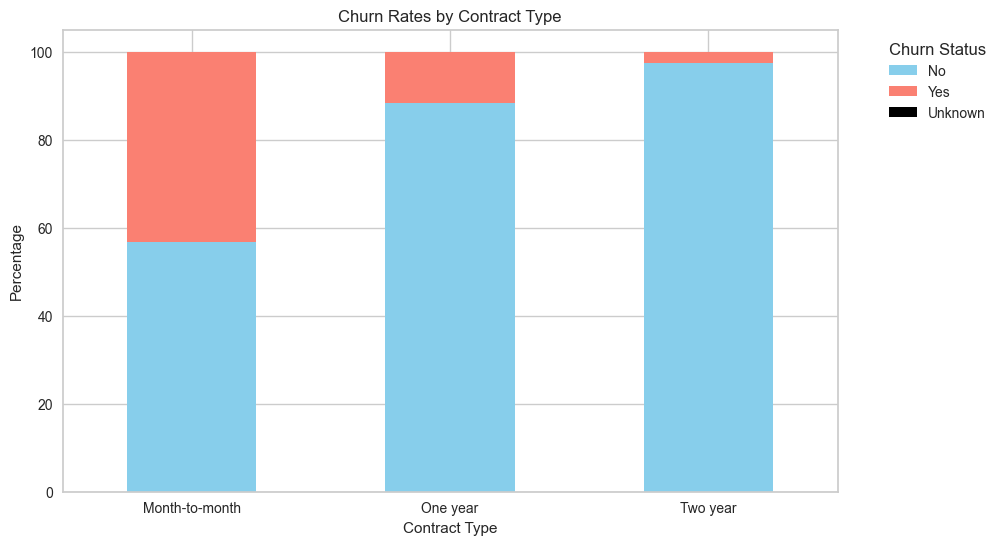

Churn,No,Yes,Unknown
Contract,,,
Month-to-month,56.851312,43.148688,0.000000
One year,88.436019,11.563981,0.000000
Two year,97.508039,2.411576,0.080386


In [44]:
# Group the data by 'Contract' and 'Churn' and count occurrences of 'Churn'
grouped_data = df_train_eda.groupby(['Contract', 'Churn'])['Churn'].count().rename('Breakdowm').reset_index()

# Calculate the percentage ratio of churn within each contract type
grouped_data['Ratio'] = grouped_data.groupby('Contract')['Breakdowm'].transform(lambda x: x / x.sum() * 100)

# Create a pivot table for easier plotting, filling NaN values with 0
pivot_data = grouped_data.pivot(index='Contract', columns='Churn', values='Ratio').fillna(0)

# Reindex the pivot table columns to ensure the order is 'No', 'Yes', 'Unknown'
desired_order = ['No', 'Yes', 'Unknown']
pivot_data = pivot_data.reindex(columns=desired_order)

# Plot the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon', 'black'])
plt.title('Churn Rates by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Percentage')
plt.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

# Display the pivot data
pivot_data

In [45]:
# # # Create a copy of the original DataFrame
# df_train_lgr = df_train_eda.copy()

# # Drop the row with the unknown value from the Churn Column
# df_train_lgr.drop(index=2988, inplace=True)
# df_train_lgr.reset_index(drop=True, inplace=True)
# df_train_lgr.drop(columns=['customerID'], axis=1, inplace=True)

# # Convert Churn to binary
# df_train_lgr['Churn'] = df_train_lgr['Churn'].map({'Yes': 1, 'No': 0})

# # Replace invalid TotalCharges with NaN
# df_train_lgr['TotalCharges'] = pd.to_numeric(df_train_lgr['TotalCharges'], errors='coerce')

# # Define numerical and categorical columns
# num_columns_lgr = df_train_lgr.select_dtypes(include=['number']).columns
# cat_columns_lgr = df_train_lgr.select_dtypes(include=['object']).columns

# # Impute missing values for numerical columns
# imputer_num = SimpleImputer(strategy='median')
# df_train_lgr[num_columns_lgr] = imputer_num.fit_transform(df_train_lgr[num_columns_lgr])

# # Impute missing values for categorical columns
# imputer_cat = SimpleImputer(strategy='most_frequent')
# df_train_lgr[cat_columns_lgr] = imputer_cat.fit_transform(df_train_lgr[cat_columns_lgr])

# # Perform one-hot encoding
# encoder = OneHotEncoder(drop='first', sparse_output=False)
# encoded_cols  = encoder.fit_transform(df_train_lgr[cat_columns_lgr])

# # Create a DataFrame with the encoded column names
# encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cat_columns_lgr))

# # Drop the original categorical columns
# df_train_lgr = df_train_lgr.drop(cat_columns_lgr, axis=1)

# # Concatenate the original DataFrame with the encoded DataFrame
# df_train_lgr = pd.concat([df_train_lgr, encoded_df], axis=1)

# # df_train_lgr = pd.get_dummies(df_train_lgr, columns=cat_columns_lgr, drop_first=True)

# df_train_lgr

In [46]:
# # Create a copy of the original DataFrame
df_train_lr = df_train_eda.copy()

# Drop the row with the unknown value from the Churn Column
df_train_lr.drop(index=2988, inplace=True)
df_train_lr.reset_index(drop=True, inplace=True)
df_train_lr.drop(columns=['customerID'], axis=1, inplace=True)

# Convert Churn to binary
df_train_lr['Churn'] = df_train_lr['Churn'].map({'Yes': 1, 'No': 0})

# Replace invalid TotalCharges with NaN
df_train_lr['TotalCharges'] = pd.to_numeric(df_train_lr['TotalCharges'], errors='coerce')

# Define numerical and categorical columns
num_columns_lr = df_train_lr.select_dtypes(include=['number']).columns
cat_columns_lr = df_train_lr.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
imputer_num = SimpleImputer(strategy='median')
df_train_lr[num_columns_lr] = imputer_num.fit_transform(df_train_lr[num_columns_lr])

# Impute missing values for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df_train_lr[cat_columns_lr] = imputer_cat.fit_transform(df_train_lr[cat_columns_lr])

# Perform one-hot encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols  = encoder.fit_transform(df_train_lr[cat_columns_lr])

# Create a DataFrame with the encoded column names
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cat_columns_lr))

# Drop the original categorical columns
df_train_lr = df_train_lr.drop(cat_columns_lr, axis=1)

# Concatenate the original DataFrame with the encoded DataFrame
df_train_lr = pd.concat([df_train_lr, encoded_df], axis=1)

# Define features and targets
X = df_train_lr.drop(columns=['Churn'], axis=1)
y = df_train_lr['Churn']

# Ensure the dataset is not empty
if X.empty or y.empty:
    raise ValueError("The dataset is empty after preprocessing. Please check the data loading and preprocessing steps.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for sufficient training samples
if X_train.shape[0] == 0:
    raise ValueError("The resulting train set is empty. Adjust the parameters or check the dataset.")

# Fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Get feature importances (coefficients)
feature_importances = pd.DataFrame({"Feature_Prefix": X_train.columns, "Coefficient": logreg.coef_[0]})
feature_importances["Feature"] = feature_importances["Feature_Prefix"].str.split("_").str[0]

# Group by Prefix and calculate mean Importance
grouped_importances = feature_importances.groupby("Feature")["Coefficient"].mean().abs().round(4).sort_values(ascending=False)

# Print selected Features using Logistic Regression Coefficients
print()
print("Top Five Features using Logistic Regression Coefficients:")
print()
print(grouped_importances.head())



Top Five Features using Logistic Regression Coefficients:

Feature
MonthlyChargesToTotalChargesRatio    1.3610
Contract                             1.0991
PhoneService                         0.7890
InternetService                      0.3496
PaperlessBilling                     0.2964
Name: Coefficient, dtype: float64


In [47]:
# # Perform a logistic regression test to obtain important features for testing the Null Hypothesis

# # Create a copy of the original DataFrame
# df_train_eda = df_train_eda.copy()

# # Convert Churn to binary
# df_train_eda['Churn'] = df_train_eda['Churn'].map({'Yes': 1, 'No': 0})

# # Handle missing values
# df_train_eda = df_train_eda.dropna()

# # Convert categorical variables to dummies
# df_train_eda = pd.get_dummies(df_train_eda, columns=df_train_eda.select_dtypes(include=["object"]).columns, drop_first=True)

# # Define features and targets
# X = df_train_eda.drop('Churn', axis=1)
# y = df_train_eda['Churn']

# # Ensure the dataset is not empty
# if X.empty or y.empty:
#     raise ValueError("The dataset is empty after preprocessing. Please check the data loading and preprocessing steps.")

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Check for sufficient training samples
# if X_train.shape[0] == 0:
#     raise ValueError("The resulting train set is empty. Adjust the parameters or check the dataset.")

# # Fit logistic regression model
# logreg = LogisticRegression(max_iter=1000)
# logreg.fit(X_train, y_train)

# # Get feature importances (coefficients)
# feature_importances = pd.DataFrame({"Feature": X_train.columns, "Coefficient": logreg.coef_[0]})

# # Group columns by their prefix before the underscore
# prefixes = feature_importances["Feature"].str.split("_", n=1).str[0]

# # Calculate the mean coefficient for each unique prefix
# mean_coefficients = feature_importances.groupby(prefixes)["Coefficient"].mean().abs().round(4).sort_values(ascending=False)

# # Print selected Features using Logistic Regression Coefficients
# print()
# print("Selected Features using Logistic Regression Coefficients:")
# print()
# print(mean_coefficients.head())
# print()


**Chi-Square Test of Independence to Test the Null Hypothesis**

In [48]:
# Perform Chi-square test between Churn and Contract

# Create a copy of the original DataFrame
df_train_chi = df_train_eda.copy()

# Convert Churn to binary
df_train_chi['Churn'] = df_train_chi['Churn'].map({'Yes': 1, 'No': 0})

# Create contingency table
contingency_table = pd.crosstab(df_train_chi['Churn'], df_train_chi['Contract'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test")
print("----------------")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test
----------------
Chi-Square Statistic: 881.6208905118242
P-value: 3.61789584641233e-192
Degrees of Freedom: 2


**Observations**

- Significant Result: Given the very low p-value, we reject the null hypothesis of independence at 0.05 significant level, hence there is a statistically significant relationship between Churn and Contract type.

**Business Implications**

- Based on the observed relationship above, the company can focus on creating more attractive long-term Contract offers to reduce churn.

#### Key Insights
- Both df_3000 & df_2000 have the same number of columns
- Both df_3000 & df_2000 have the same column names
- df_3000 and df_2000 combined to one dataframe as df_train
- A copy of the original dataset has been created as df_train_eda and used for the EDA
- Convert the TotalCharges column to float and SeniorCitizen back to boolean dtype
- There are 6 columns which contains over 12% of missing values with one other column containing 5.3% of missing values
- There are no duplicated values in the df_train dataset
- A view of the unique values of the columns indicates irregular boolean dtype ie:('PhoneService') has 4 unique values [False True 'Yes' 'No']
- Applied a standardization function to rectify the irregular boolean dtypes for the following: ('Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'SeniorCitizen')
- The most frequent values observed by columns are as follows: Male('gender'), Fiber optic('InternetService'), Month-to-month('Contract') & Electronic check('PaymentMethod')
- For ease of analysis, the features have been segmented as follows:

  **target = Churn** The target variable

  **subscriber_account_numerical = [tenure, MonthlyCharges, TotalCharges]** 

  **subscriber_account_categorical = [Contract, PaperlessBilling, PaymentMethod, customerID]**
  
  **subscriber_demographic = [gender, Partner, SeniorCitizen, Dependents]**

  **subscribtions = [PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies]**
                                                            
- The Comapany Churn rate is 26.5%
- For the Subscriber Account segment, distribution of ('Contract'), 54% are month-to-month and the rest of the 46% are almost evenly split the annual & 2years contracts
- The Churn rate for the month-to-month contract is 23% in relation to the other contract types and is quite close the Company Churn rate of 26.5%
- Subscribers with PhoneService Churn at 24.1% which is close to the company's churn rate of 26.49%
- Even though the are more DSL(27,9%) than Fiber Optic(25.7%) InternetService subscribers, the DSL subscribers Churn at (6.1%) which is three times less than the fiber Optic
 subscribers who Churn at 18.9% respectively
- Subscribers with OnlineSecurity and TechSupport have lower Churn rates at 4.2% and 4.4% respectively versus subcribers without these services who churn at 20.7% and 20.6% respectively
- Even though the distribution of No Churn rate for all PaymentMethod hover around 18%, the Churn rate for Electronic check is 15.% which over three(3) times higher than the other PaymentMethods
- The Churn rate for Subscriber Demographics are as follows: ('gender') both Males and Females are the same approximately 13%, and those with ('Partners') Churn at 9.8% versus those without Churn at 16%
- The Subscriber numerical features are not normally distributed
- Dataset is not balanced
- The churn effect of TotalCharges appears to correlate with the effect of tenure (strong) and MonthlyCharges (moderate).
- There are a high number of high outliers for the total charges of people that churned compared to does that did not.
- There are noticeable high outliers for the tenure of females that churn.
-Customer churn rates vary significantly with different types of contracts. This information can be valuable for developing strategies to reduce churn by focusing on specific contract types that are more likely associated with higher churn rates.

[Back to Top](#Table-of-Contents)

## Step 3: Data Preparation & Feature Engineering

`Split data set into X and y`

`Split data set into training and evaluation`

`Feature Engineering (Craeting New Features, (binning & bucketing), Handling Missing Data, Encoding, Standardization, Normalization, Scaling)`
- Create a pipeline to preprocess the data

- Separate inpute features into numeric and categorical for different pipelines

- Handle missing values using imputation Techniques Use sklearn.impute.SimpleImputer

- Scaling or normalize numeric features: Use sklearn.preprocessing.StandardScaler to scale the numerical features

- Encode categorical features: Use OneHotEncoder to encode categorical features

- Transformations for skewed data (log, power, custom, etc)
    
- Balance dataset (depending on what you see): Use sklearn.utils.resample to balance the dataset and or use Over-sampling/Under-sampling methods, more details here:       https://imbalanced-learn.org/stable/install.html

`Features Creation`

### Split Dataset into Input and Output (X, y)

In [49]:
# Convert object columns to category datatype

# Copy df_train_eda
df_train_model = df_train_eda.copy()

# Drop missing values from Churn Column
df_train_model.drop(index=2988, inplace=True)

# Reset the index of the Dataframe
df_train_model.reset_index(drop=True, inplace=True)

# Identify object columns to convert to category datatype
object_columns_to_convert = [col for col in df_train_model.select_dtypes(include=['object']).columns]
 
# Convert object columns to category datatype
df_train_model[object_columns_to_convert] = df_train_model[object_columns_to_convert].astype('category')

# Display DataFrame information with deep memory usage
df_train_model.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   customerID                         5042 non-null   category
 1   gender                             5042 non-null   category
 2   SeniorCitizen                      5042 non-null   category
 3   Partner                            5042 non-null   category
 4   Dependents                         5042 non-null   category
 5   tenure                             5042 non-null   int64   
 6   PhoneService                       5042 non-null   category
 7   MultipleLines                      5042 non-null   category
 8   InternetService                    5042 non-null   category
 9   OnlineSecurity                     5042 non-null   category
 10  OnlineBackup                       5042 non-null   category
 11  DeviceProtection                   5042 non

In [50]:
# View the unique values of the Churn column

df_train_model['Churn'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [51]:
df_train_model['Churn'].value_counts()

Churn
No     3706
Yes    1336
Name: count, dtype: int64

In [52]:
# View the shape of the dataframe

df_train_model.shape

(5042, 23)

In [53]:
# Oversampler

df_majority = df_train_model[df_train_model['Churn'] == 'No']
df_minority = df_train_model[df_train_model['Churn'] == 'Yes']

df_minority_upsampled = resample(df_minority,
                                 replace=True,               # sample with replacement
                                 n_samples=len(df_majority), # same length as majority class
                                 random_state=42)            # for reproducibility

train_model_df = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
train_model_df['Churn'].value_counts()

Churn
No     3706
Yes    3706
Name: count, dtype: int64

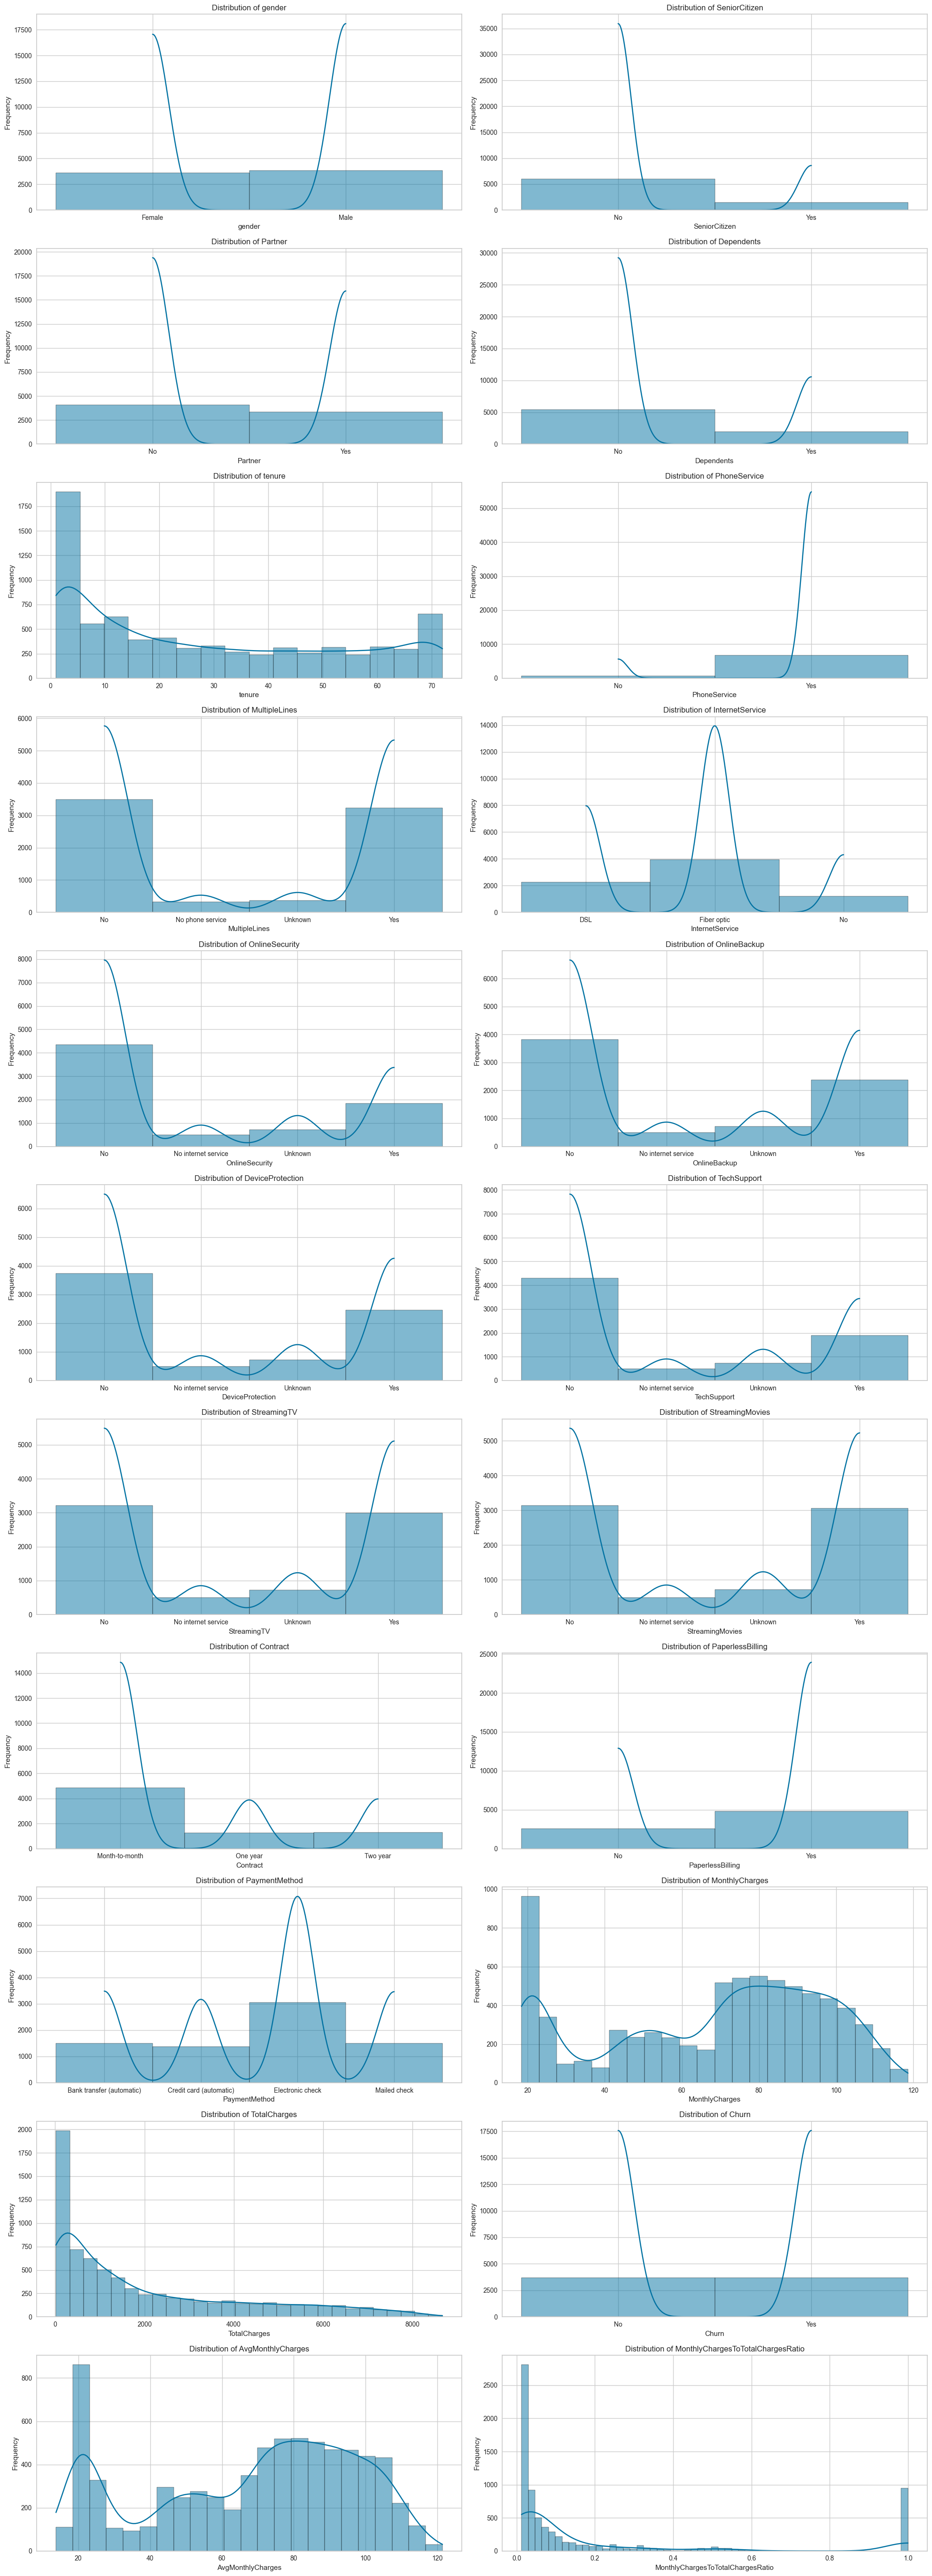

In [54]:
# Get the list of columns in train_model_df excluding 'customerID'
columns = [col for col in train_model_df.columns if col != 'customerID']

# Determine the number of rows and columns for subplots
num_cols = len(columns)
num_rows = (num_cols + 1) // 2  # Adjust as needed for layout

# Create figure and axes
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5*num_rows))

# Flatten axes if necessary
axes = axes.flatten()

# Loop through columns and plot each one
for i, col in enumerate(columns):
    if train_model_df[col].dtype == 'object':
        # Categorical feature: Use value counts bar plot
        freq = train_model_df[col].value_counts()
        axes[i].bar(freq.index, freq.values)
        axes[i].set_title(f'Frequency of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=90)
        plt.sca(axes[i])  # Set the current subplot
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability  # Rotate x-axis labels for better readability
    else:
        # Numerical feature: Use value counts histogram-like bar plot
        sns.histplot(train_model_df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [55]:
# View the shape of the dataframe

train_model_df.shape

(7412, 23)

In [56]:
# Split data into features and target

X = train_model_df.drop(['Churn', 'customerID'], axis=1)
y = df_train_model['Churn']
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,AvgMonthlyCharges,MonthlyChargesToTotalChargesRatio
0,Female,No,Yes,No,1,No,Unknown,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,29.850000,1.000000
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,55.573529,0.030140
3,Male,No,No,No,45,No,Unknown,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,40.905556,0.022980
6,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.099998,1949.400024,88.609092,0.045706
7,Female,No,No,No,10,No,Unknown,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.750000,301.899994,30.189999,0.098543


In [57]:
# View head of target variable(y)
y = train_model_df['Churn']
y.head()

0    No
1    No
3    No
6    No
7    No
Name: Churn, dtype: category
Categories (2, object): ['No', 'Yes']

In [58]:
# View the unique value of the target variable

y.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [59]:
# View the input variables

X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges',
       'MonthlyChargesToTotalChargesRatio'],
      dtype='object')

### Split data set into training and evaluation

In [60]:
# Separate numeric and categorical columns

num_columns = X.select_dtypes('number').columns
cat_columns = X.select_dtypes('category').columns


In [61]:
# Preview the separated numeric columns

num_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges',
       'MonthlyChargesToTotalChargesRatio'],
      dtype='object')

In [62]:
# Preview the categorical columns

cat_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [63]:
# View info of input variables

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7412 entries, 0 to 2494
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             7412 non-null   category
 1   SeniorCitizen                      7412 non-null   category
 2   Partner                            7412 non-null   category
 3   Dependents                         7412 non-null   category
 4   tenure                             7412 non-null   int64   
 5   PhoneService                       7412 non-null   category
 6   MultipleLines                      7412 non-null   category
 7   InternetService                    7412 non-null   category
 8   OnlineSecurity                     7412 non-null   category
 9   OnlineBackup                       7412 non-null   category
 10  DeviceProtection                   7412 non-null   category
 11  TechSupport                        7412 non-null

In [64]:
# View summary statistics

X.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7412.0,27.969104,24.055416,1.000000,5.000000,22.000000,49.000000,72.000000
MonthlyCharges,7412.0,68.394974,28.790129,18.400000,45.700001,74.725000,91.050003,118.650002
TotalCharges,7404.0,2071.184172,2198.904431,18.799999,281.000000,1178.250000,3342.624939,8670.100000
AvgMonthlyCharges,7404.0,68.399003,28.935440,13.775000,45.700001,74.699997,91.751425,121.400002
MonthlyChargesToTotalChargesRatio,7404.0,0.206597,0.325026,0.012604,0.020373,0.046674,0.189500,1.000000


In [65]:
# Loop through each numerical column in the list
for col in num_columns:
    # Calculate skewness and kurtosis
    skewness = round(X[col].skew(), 2)
    kurtosis = round(X[col].kurtosis(), 2)

    # Print column name and its statistics
    print(f"Column: {col}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print("-" * 40)

Column: tenure
Skewness: 0.49
Kurtosis: -1.19
----------------------------------------
Column: MonthlyCharges
Skewness: -0.41
Kurtosis: -1.05
----------------------------------------
Column: TotalCharges
Skewness: 1.09
Kurtosis: 0.08
----------------------------------------
Column: AvgMonthlyCharges
Skewness: -0.4
Kurtosis: -1.05
----------------------------------------
Column: MonthlyChargesToTotalChargesRatio
Skewness: 1.8
Kurtosis: 1.64
----------------------------------------


In [66]:
# Preview the counts of the target columns

y.value_counts()

Churn
No     3706
Yes    3706
Name: count, dtype: int64

In [67]:
# Verify the target variable for potential missing values

y.isnull().sum()

0

In [68]:
# Initialize an encoder with the training data and evaluation data

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [69]:
# Define oversampling technique with adjusted parameters

over_sampler = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=5)

In [70]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize the StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Use the split method to get the train and evaluation indices
for train_index, eval_index in sss.split(X, y):
    X_train, X_eval = X.iloc[train_index], X.iloc[eval_index]
    y_train, y_eval = y[train_index], y[eval_index]

# Display the shapes of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_eval shape: {X_eval.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_eval shape: {y_eval.shape}")

X_train shape: (5929, 21)
X_eval shape: (1483, 21)
y_train shape: (5929,)
y_eval shape: (1483,)


### Pipeline

In [71]:
# Create pipelines and Column Transformer

# Create a Data Preprocessing Pipeline for all the numerical variables
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('rob', RobustScaler()),
    ('power-transformation', PowerTransformer(method='yeo-johnson'))])

# Create a Data Preprocessing Pipeline for all the categorical variables
cat_pipe = Pipeline(steps=[
    ('Cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe, num_columns),
    ('cat', cat_pipe, cat_columns)
    ])


In [72]:
from sklearn.preprocessing import quantile_transform
# Create a Data Preprocessing Pipeline for all the numerical variables
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('quantile_transform', FunctionTransformer(func=quantile_transform, kw_args={'output_distribution': 'normal'}, validate=False)),
    ('rob', RobustScaler())
    ])

# Create a Data Preprocessing Pipeline for all the categorical variables
cat_pipe = Pipeline(steps=[
    ('Cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe, num_columns),
    ('cat', cat_pipe, cat_columns)
    ])

In [73]:
# View the preprocessor

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('quantile_transform',
                                                  FunctionTransformer(func=<function quantile_transform at 0x000001F11EA063E0>,
                                                                      kw_args={'output_distribution': 'normal'})),
                                                 ('rob', RobustScaler())]),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges',
       'MonthlyChargesToT...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

[Back to Top](#Table-of-Contents)

## Step 4: Modeling and Evaluation

`Fit data to the pipeline and train Model`

- Train Model 1 - Distance based model

- Train Model 2 - Gradient Descent model

- Train Model 3 - Tree based model

- Train Model 4 - Neural Network

**Fit data to the pipeline and train Model**

In [74]:
# Define oversampling technique

over_sampler = SMOTE(random_state=42)

In [76]:
# Define the models

models = [
('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('LR', LogisticRegression(max_iter=1000, random_state=42, solver='liblinear', C=1.0)),
    ('RF', RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)),
    ('SVC', SVC(random_state=42, probability=True, kernel='rbf', C=1.0, gamma='scale')),
    ('GB', GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)),
    ('XB', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss", n_estimators=100, learning_rate=0.1, max_depth=3))
]

In [78]:
# Fit and display models via pipeline

from IPython.display import display, HTML

pipelines = []

for model_name, classifier in models:
    # Create the pipeline for each model
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('ovr', over_sampler),
        ('model', classifier)
    ])
    pipelines.append((model_name, pipeline))

# Display pipelines in two columns
def display_pipelines(pipelines, models_per_row=2):
    all_pipelines_html = "<div style='display: flex; flex-wrap: wrap;'>"
    for i, (model_name, pipeline) in enumerate(pipelines):
        all_pipelines_html += f"<div style='flex: 1 1 {50/models_per_row}%; margin: 10px;'> "
        all_pipelines_html += f"<h3>Pipeline Diagram for {model_name}:</h3>\n"
        all_pipelines_html += pipeline._repr_html_()
        all_pipelines_html += "</div>"  
        if (i + 1) % models_per_row == 0:
            all_pipelines_html += "<div style='clear: both;'></div>"
    all_pipelines_html += "</div>"  
    display(HTML(all_pipelines_html))

display_pipelines(pipelines)

In [79]:
# Train and Evaluate models

from sklearn.metrics import log_loss

# Define target names for classification report
target_names = ["No", "Yes"]

# Initialize results dictionary
eval_results = {}

# # Evaluate the models above using the roc_auc_score
for model_name, classifier in models:
    # Create the pipeline for each model
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('ovr', over_sampler),
        ('model', classifier)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Transform the evaluation data using only the preprocessor part of the pipeline
    X_eval_preprocessed = pipeline.named_steps['preprocessor'].transform(X_eval)
    
    # Predict on the evaluation data
    y_pred = pipeline.named_steps['model'].predict(X_eval_preprocessed)
    
    # Calculate ROC AUC Score
    if hasattr(pipeline.named_steps['model'], 'predict_proba'):
        y_prob = pipeline.named_steps['model'].predict_proba(X_eval_preprocessed)
        roc_auc = roc_auc_score(y_eval, y_prob[:, 1])
    else:
        print(f"{model_name} model does not support probability prediction.")
        continue

    accuracy = accuracy_score(y_eval, y_pred)
    f1 = f1_score(y_eval, y_pred)
    precision = precision_score(y_eval, y_pred)
    recall = recall_score(y_eval, y_pred)
    conf_matrix = confusion_matrix(y_eval, y_pred)
    logloss = log_loss(y_eval, y_prob) if y_prob is not None else None

    # # Save the model to disk
    # joblib.dump(pipeline, f'{model_name}_model.joblib')

    # Store the results
    eval_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'log_loss': logloss,
        'f1_score': f1,
        'ROC AUC Score': roc_auc,
        'Predictions': y_pred,
        'y_prob': y_prob
        
    }

df_scores = pd.DataFrame(eval_results).transpose()
df_scores = df_scores.drop(['Predictions', 'y_prob'], axis=1)
df_scores_sorted = df_scores.sort_values(by="f1_score", ascending=False)


print("Model Evaluation Scores:")
df_scores_sorted

Model Evaluation Scores:


,accuracy,precision,recall,log_loss,f1_score,ROC AUC Score
RF,0.890088,0.851582,0.944669,0.302858,0.895713,0.950959
KNN,0.774107,0.733871,0.859649,1.784235,0.791796,0.856785
XB,0.778827,0.749698,0.836707,0.462541,0.790816,0.856612
GB,0.778152,0.755583,0.821862,0.468597,0.78733,0.852998
SVC,0.774781,0.745476,0.834008,0.477006,0.787261,0.850952
LR,0.758597,0.735547,0.807018,0.487121,0.769627,0.8427


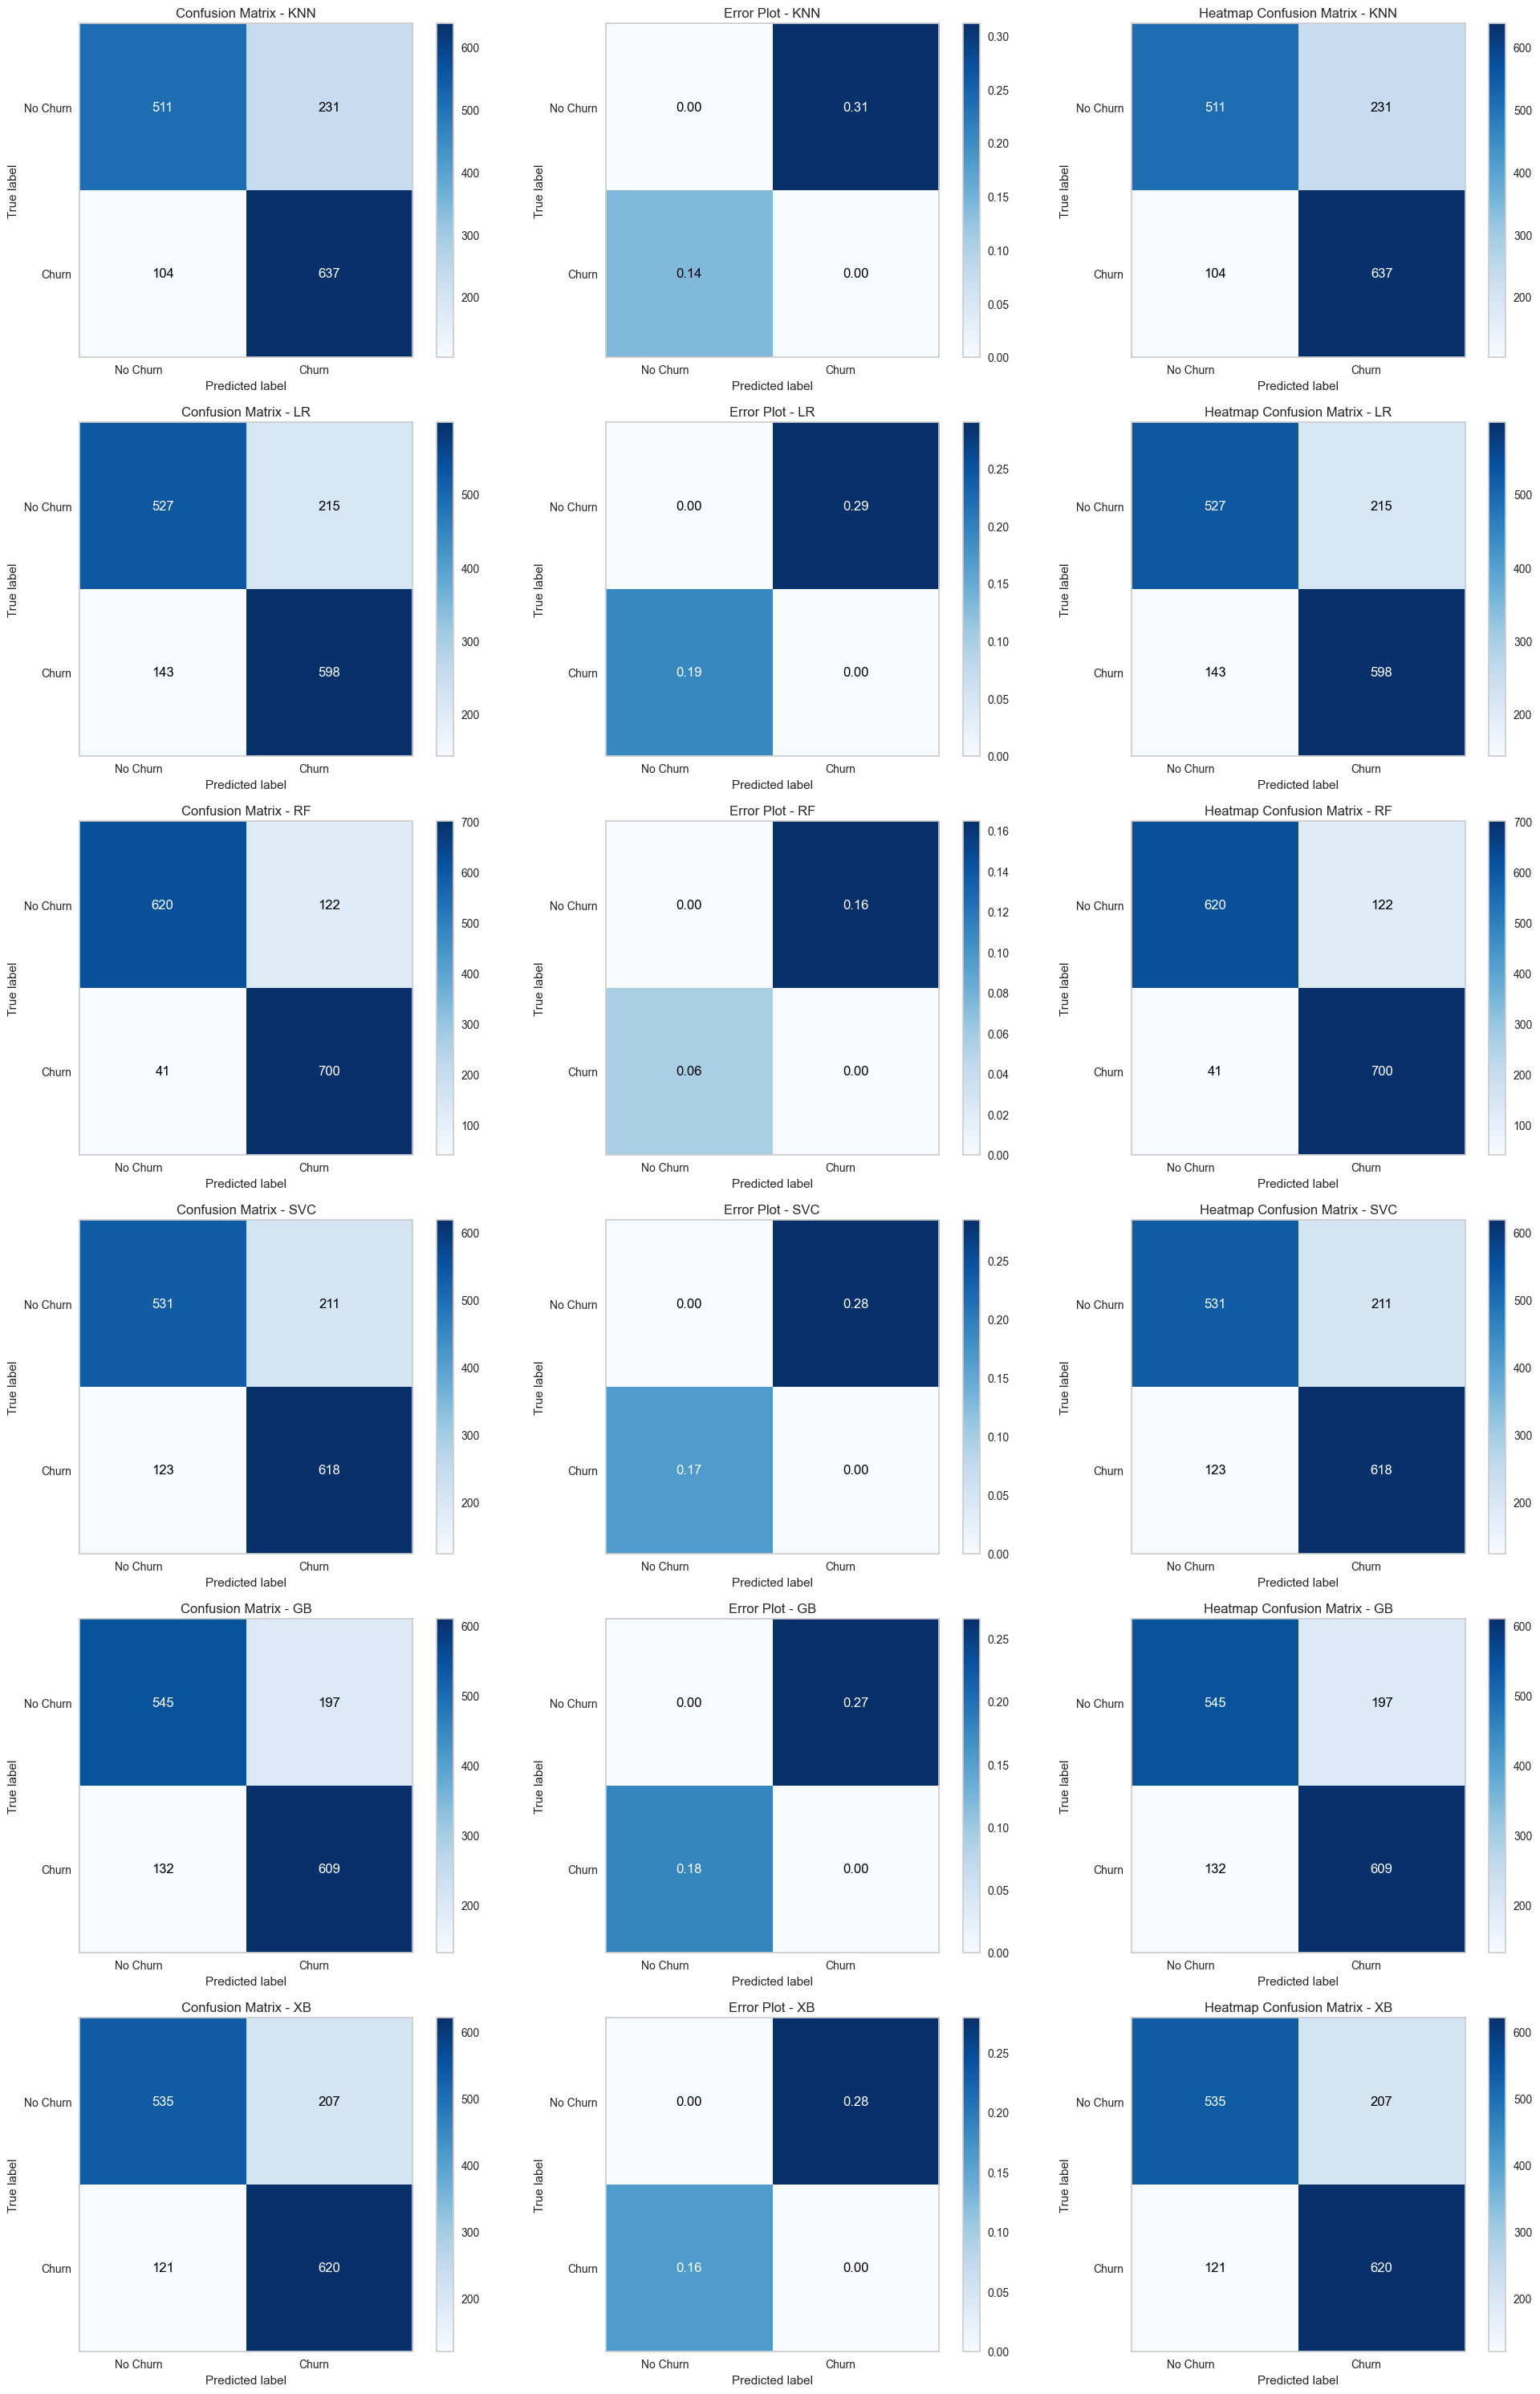

In [80]:
# View models with Confusion Matrix

# Assuming eval_results is a dictionary with model predictions
# Assuming y_eval is the true labels
target_names = ['No Churn', 'Churn']  # Adjust as necessary

# Number of rows needed for subplots (3 plots per model)
num_rows = len(models)

# Create figure and axes
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5*num_rows))

for idx, (model_name, classifier) in enumerate(models):
    y_pred_plot = eval_results[model_name]['Predictions'] 
    y_true_plot = y_eval

    # Compute confusion matrix
    cm = confusion_matrix(y_true_plot, y_pred_plot)

    # Compute normalized confusion matrix (as a percentage of true class)
    row_sums = cm.sum(axis=1, keepdims=True)
    norm_cm = cm / row_sums

    # Fill diagonal with zeros for better visualization of errors
    np.fill_diagonal(norm_cm, 0)  

    # Plot raw confusion matrix
    ax = axes[idx, 0]
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f"Confusion Matrix - {model_name}")
    ax.set_xticks(np.arange(len(target_names)))
    ax.set_yticks(np.arange(len(target_names)))
    ax.set_xticklabels(target_names)
    ax.set_yticklabels(target_names)
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.colorbar(im, ax=ax)
    ax.grid(False)  # Remove grid lines

    # Annotate each cell with the numerical values
    for i in range(len(target_names)):
        for j in range(len(target_names)):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2. else "black")

    # Plot normalized confusion matrix (error plot)
    ax = axes[idx, 1]
    im = ax.imshow(norm_cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f"Error Plot - {model_name}")
    ax.set_xticks(np.arange(len(target_names)))
    ax.set_yticks(np.arange(len(target_names)))
    ax.set_xticklabels(target_names)
    ax.set_yticklabels(target_names)
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.colorbar(im, ax=ax)
    ax.grid(False)  # Remove grid lines

    # Annotate each cell with the numerical values
    for i in range(len(target_names)):
        for j in range(len(target_names)):
            ax.text(j, i, format(norm_cm[i, j], '.2f'),
                    ha="center", va="center",
                    color="white" if norm_cm[i, j] > norm_cm.max() / 2. else "black")

    # Plot heatmap confusion matrix
    ax = axes[idx, 2]
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f"Heatmap Confusion Matrix - {model_name}")
    ax.set_xticks(np.arange(len(target_names)))
    ax.set_yticks(np.arange(len(target_names)))
    ax.set_xticklabels(target_names)
    ax.set_yticklabels(target_names)
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.colorbar(im, ax=ax)
    ax.grid(False)  # Remove grid lines

    # Annotate each cell with the numerical values
    for i in range(len(target_names)):
        for j in range(len(target_names)):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.tight_layout()
plt.show()

In [81]:
m = eval_results[model_name]['y_prob']
m

array([[0.71571106, 0.28428894],
       [0.3717112 , 0.6282888 ],
       [0.23360616, 0.76639384],
       ...,
       [0.18020844, 0.81979156],
       [0.08670163, 0.91329837],
       [0.26233143, 0.7376686 ]], dtype=float32)

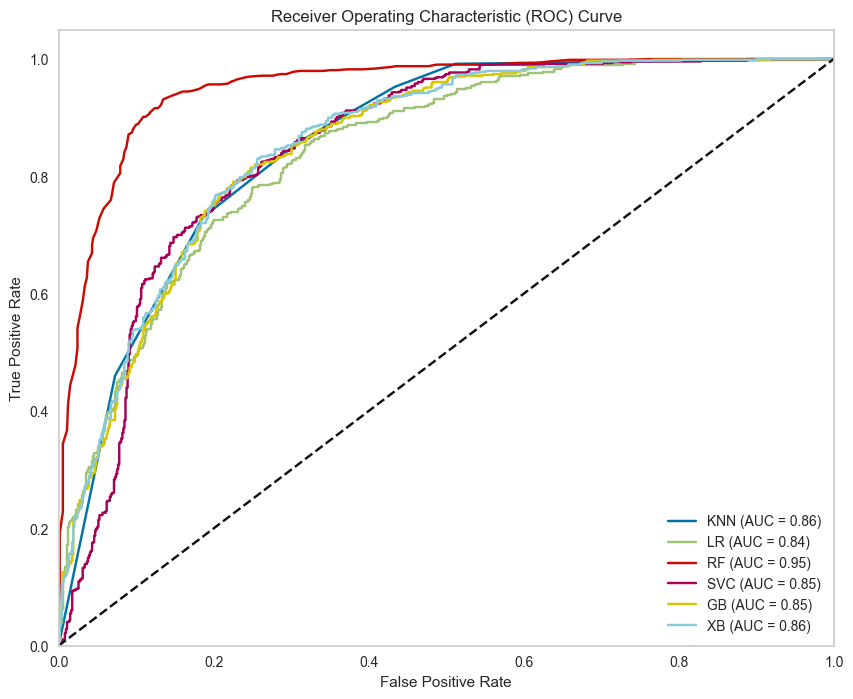

In [82]:
# View the results from the model using ROC

plt.figure(figsize=(10, 8))
for model_name, metrics in eval_results.items():
    y_prob = metrics['y_prob'][:, 1]
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_eval, y_prob, pos_label=1)
    auc_score = metrics['ROC AUC Score']

    roc_curve_data_F = pd.DataFrame({
        'False positive':fpr,
        'True positive': tpr,
        'Threshold': thresholds,

    })
    
    # Add ROC curve data to the table
    eval_results[model_name] = roc_curve_data_F

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

In [85]:
# View RandomForest Model

eval_results['RF'].tail(30)

,False positive,True positive,Threshold
85,0.340970,0.979757,0.280000
86,0.350404,0.981107,0.270000
87,0.358491,0.981107,0.260000
88,0.359838,0.981107,0.256667
89,0.371968,0.982456,0.250000
90,0.378706,0.982456,0.240000
91,0.392183,0.982456,0.230000
92,0.408356,0.983806,0.220000
93,0.428571,0.986505,0.210000
94,0.435310,0.987854,0.200000


### Hyperparameter Tuning

In [86]:


# Define parameter grid for HalvingGridSearchCV
param_grid = {
        'KNN':{
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
        'LR':{
        'model__C': [0.1, 1.0, 10.0],
        'model__penalty': ['l1', 'l2'],
        'model__solver': ['liblinear']
    },
        'RF':{
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
        'SVC':{
        'model__C': [0.1, 1.0, 10.0],
        'model__gamma': ['scale', 'auto'],
        'model__kernel': ['rbf', 'linear', 'poly']
    },
    'GB':{
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.05, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    },
    'XB':{
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.05, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    }
}

# Initializing an empty dictionary to hold the GridSearchCV results for each model
grid_searches_tuned = {}

# Hyperparameter tuning loop
for model_name, classifier in models:
    # Create the pipeline for each model
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('ovr', over_sampler),
        ('model', classifier)
    ])

    
    # Create HalvingGridSearchCV object
    grid_search_tuned = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid[model_name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    # Fit grid search on training data
    grid_search_tuned.fit(X_train, y_train)
    
    # Store the grid search object in the dictionary
    grid_searches_tuned[model_name] = {'grid_search_tuned': grid_search_tuned}
    
    # Print the best parameters and best score
    print(f"Best parameters for {model_name}:")
    print(grid_search_tuned.best_params_)
    print(f"Best cross-validation score for {model_name}:")
    print(grid_search_tuned.best_score_)
    print()

grid_searches_tuned

Best parameters for KNN:
{'model__algorithm': 'auto', 'model__n_neighbors': 3, 'model__weights': 'distance'}
Best cross-validation score for KNN:
0.8269508541991305

Best parameters for LR:
{'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best cross-validation score for LR:
0.7837728492041467

Best parameters for RF:
{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best cross-validation score for RF:
0.8767054453860439

Best parameters for SVC:
{'model__C': 10.0, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best cross-validation score for SVC:
0.8212160152553348

Best parameters for GB:
{'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 200}
Best cross-validation score for GB:
0.8210500850285681

Best parameters for XB:
{'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 200}
Best cross-validation score for XB:
0.8266141552998769



{'KNN': {'grid_search_tuned': GridSearchCV(cv=5,
               estimator=Pipeline(steps=[('preprocessor',
                                          ColumnTransformer(transformers=[('num',
                                                                           Pipeline(steps=[('imputer',
                                                                                            SimpleImputer(strategy='median')),
                                                                                           ('quantile_transform',
                                                                                            FunctionTransformer(func=<function quantile_transform at 0x000001F11EA063E0>,
                                                                                                                kw_args={'output_distribution': 'normal'})),
                                                                                           ('rob',
                                         

In [106]:
# Define parameter grid for HalvingGridSearchCV
param_grid = {
        'KNN':{
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
        'RF':{
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
        'XB':{
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.05, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    }
}

# Initialize dictionary to store best params and best model
best_models = {}
best_params = {}

# Hyperparameter tuning loop
for model_name, params in param_grid.items():
    # Create Pipeline object
    fin_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('ovr', over_sampler),
        ('model', classifier)
    ])

# Create HalvingGridSearchCV object
    grid_search_tuned = GridSearchCV(estimator=fin_pipeline, param_grid=param_grid[model_name], cv=5, scoring='accuracy', n_jobs=-1)    

# Fit grid search on training data
    grid_search_tuned.fit(X_train, y_train)

# Store best model and its parameters
    best_models[model_name] = grid_search_tuned.best_estimator_
    best_params[model_name] = grid_search_tuned.best_params_

# Print best parameters for each model
for model_name, params in best_params.items():
    print(f"The best parameters for {model_name}: {params}")


The best parameters for KNN: {'model__algorithm': 'auto', 'model__n_neighbors': 3, 'model__weights': 'uniform'}
The best parameters for RF: {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
The best parameters for XB: {'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 200}


**Making Predictions using Fine-Tuned Models**

In [ ]:
# define table to hold all the metrics
tuned_metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'logloss'])

tuned_metrics = {}
for model_name, model in best_models.items():
   
    # make predictions on the fine_tuned model
    y_predict = model.predict(X_eval_preprocessed)

# # Calculate ROC AUC Score
#     if hasattr(grid_searches_tuned.best_estimator_, "predict_proba"):
#         y_prob = grid_searches_tuned.predict_proba(X_eval_preprocessed)[:, 1]
#         roc_auc = roc_auc_score(y_eval, y_prob[:, 1])
#     else:
#         print(f"{model_name} model does not support probability prediction.")
#         continue


In [104]:
# # Define target names for classification report
# target_names = ["No Churn", "Churn"]

# # Initialize results dictionary
# eval_results_tuned = {}

# for model_name in grid_searches_tuned.items():
#     y_pred = grid_searches_tuned[model_name].predict(X_eval_preprocessed)
   
#     # Calculate ROC AUC Score
#     if hasattr(grid_searches_tuned.best_estimator_, "predict_proba"):
#         y_prob = grid_searches_tuned.predict_proba(X_eval_preprocessed)[:, 1]
#         roc_auc = roc_auc_score(y_eval, y_prob[:, 1])
#     else:
#         print(f"{model_name} model does not support probability prediction.")
#         continue

#     accuracy = accuracy_score(y_eval, y_pred)
#     f1 = f1_score(y_eval, y_pred)
#     precision = precision_score(y_eval, y_pred)
#     recall = recall_score(y_eval, y_pred)
#     conf_matrix = confusion_matrix(y_eval, y_pred)
#     logloss = log_loss(y_eval, y_prob) if y_prob is not None else None

#     # Store the results
#     eval_results_tuned[model_name] = {
#         'accuracy': accuracy,
#         'precision': precision,
#         'recall': recall,
#         'log_loss': logloss,
#         'f1_score': f1,
#         'ROC AUC Score': roc_auc,
#         'Predictions': y_pred,
#         'y_prob': y_prob
        
#     }
    
# #     # # Save the model to disk
# #     # joblib.dump(pipeline, f'{model_name}_model.joblib')

# df_scores_tuned = pd.DataFrame(eval_results_tuned).transpose()
# df_scores_tuned = df_scores.drop(['Predictions', 'y_prob'], axis=1)
# df_scores_tuned_sorted = df_scores_tuned.sort_values(by="ROC AUC Score", ascending=False)


# print("Model Evaluation Scores:")
# df_scores_tuned_sorted

# # # Evaluate the models above using the roc_auc_score
# for model_name, classifier in models:
#     # Create the pipeline for each model
#     pipeline = ImbPipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('ovr', over_sampler),
#         ('model', classifier)
#     ])

#     # Fit the pipeline on the training data
#     pipeline.fit(X_train, y_train)
    
#     # Transform the evaluation data using only the preprocessor part of the pipeline
#     X_eval_preprocessed = pipeline.named_steps['preprocessor'].transform(X_eval)
    
#     # Predict on the evaluation data
#     y_pred = pipeline.named_steps['model'].predict(X_eval_preprocessed)
    
#     # Calculate ROC AUC Score
#     if hasattr(pipeline.named_steps['model'], 'predict_proba'):
#         y_prob = pipeline.named_steps['model'].predict_proba(X_eval_preprocessed)
#         roc_auc = roc_auc_score(y_eval, y_prob[:, 1])
#     else:
#         print(f"{model_name} model does not support probability prediction.")
#         continue

#     accuracy = accuracy_score(y_eval, y_pred)
#     f1 = f1_score(y_eval, y_pred)
#     precision = precision_score(y_eval, y_pred)
#     recall = recall_score(y_eval, y_pred)
#     conf_matrix = confusion_matrix(y_eval, y_pred)
#     logloss = log_loss(y_eval, y_prob) if y_prob is not None else None

#     # # Save the model to disk
#     # joblib.dump(pipeline, f'{model_name}_model.joblib')

#     # Store the results
#     eval_results[model_name] = {
#         'accuracy': accuracy,
#         'precision': precision,
#         'recall': recall,
#         'log_loss': logloss,
#         'f1_score': f1,
#         'ROC AUC Score': roc_auc,
#         'Predictions': y_pred,
#         'y_prob': y_prob
        
#     }

# df_scores = pd.DataFrame(eval_results).transpose()
# df_scores = df_scores.drop(['Predictions', 'y_prob'], axis=1)
# df_scores_sorted = df_scores.sort_values(by="f1_score", ascending=False)


# print("Model Evaluation Scores:")
# df_scores_sorted

TypeError: unhashable type: 'dict'

[Back to Top](#Table-of-Contents)

## Step 6: Document the entire process in an article on medium